# TV Script Generation
In this project, you'll generate your own [Simpsons](https://en.wikipedia.org/wiki/The_Simpsons) TV scripts using RNNs.  You'll be using part of the [Simpsons dataset](https://www.kaggle.com/wcukierski/the-simpsons-by-the-data) of scripts from 27 seasons.  The Neural Network you'll build will generate a new TV script for a scene at [Moe's Tavern](https://simpsonswiki.com/wiki/Moe's_Tavern).
## Get the Data
The data is already provided for you.  You'll be using a subset of the original dataset.  It consists of only the scenes in Moe's Tavern.  This doesn't include other versions of the tavern, like "Moe's Cavern", "Flaming Moe's", "Uncle Moe's Family Feed-Bag", etc..

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

data_dir = './data/simpsons/moes_tavern_lines.txt'
text = helper.load_data(data_dir)
# Ignore notice, since we don't use it for analysing the data
text = text[81:]

## Explore the Data
Play around with `view_sentence_range` to view different parts of the data.

In [2]:
view_sentence_range = (0, 10)

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

print('Dataset Stats')
print('Roughly the number of unique words: {}'.format(len({word: None for word in text.split()})))
scenes = text.split('\n\n')
print('Number of scenes: {}'.format(len(scenes)))
sentence_count_scene = [scene.count('\n') for scene in scenes]
print('Average number of sentences in each scene: {}'.format(np.average(sentence_count_scene)))

sentences = [sentence for scene in scenes for sentence in scene.split('\n')]
print('Number of lines: {}'.format(len(sentences)))
word_count_sentence = [len(sentence.split()) for sentence in sentences]
print('Average number of words in each line: {}'.format(np.average(word_count_sentence)))

print()
print('The sentences {} to {}:'.format(*view_sentence_range))
print('\n'.join(text.split('\n')[view_sentence_range[0]:view_sentence_range[1]]))

Dataset Stats
Roughly the number of unique words: 11492
Number of scenes: 262
Average number of sentences in each scene: 15.251908396946565
Number of lines: 4258
Average number of words in each line: 11.50164396430249

The sentences 0 to 10:

Moe_Szyslak: (INTO PHONE) Moe's Tavern. Where the elite meet to drink.
Bart_Simpson: Eh, yeah, hello, is Mike there? Last name, Rotch.
Moe_Szyslak: (INTO PHONE) Hold on, I'll check. (TO BARFLIES) Mike Rotch. Mike Rotch. Hey, has anybody seen Mike Rotch, lately?
Moe_Szyslak: (INTO PHONE) Listen you little puke. One of these days I'm gonna catch you, and I'm gonna carve my name on your back with an ice pick.
Moe_Szyslak: What's the matter Homer? You're not your normal effervescent self.
Homer_Simpson: I got my problems, Moe. Give me another one.
Moe_Szyslak: Homer, hey, you should not drink to forget your problems.
Barney_Gumble: Yeah, you should only drink to enhance your social skills.



## Implement Preprocessing Functions
The first thing to do to any dataset is preprocessing.  Implement the following preprocessing functions below:
- Lookup Table
- Tokenize Punctuation

### Lookup Table
To create a word embedding, you first need to transform the words to ids.  In this function, create two dictionaries:
- Dictionary to go from the words to an id, we'll call `vocab_to_int`
- Dictionary to go from the id to word, we'll call `int_to_vocab`

Return these dictionaries in the following tuple `(vocab_to_int, int_to_vocab)`

In [3]:
import numpy as np
import problem_unittests as tests
import re

def create_lookup_tables(text):
    """
    Create lookup tables for vocabulary
    :param text: The text of tv scripts split into words
    :return: A tuple of dicts (vocab_to_int, int_to_vocab)
    """

    text = ''.join([c.lower()+' ' for c in text])
    #text_for_lookup  = sorted(list(set(re.split('(\W)+', text))))
    #marks_for_lookup = sorted(list(set(re.split('(\w)+', text))))
    #text_for_lookup  = sorted(list(set(text_for_lookup + (marks_for_lookup))))
    text_for_lookup = sorted(list(set(re.split(' ', text))))

    int_to_vocab = dict((i, c) for i, c in enumerate(text_for_lookup))
    vocab_to_int = dict((c, i) for i, c in enumerate(text_for_lookup))

    return vocab_to_int, int_to_vocab

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_create_lookup_tables(create_lookup_tables)

Tests Passed


### Tokenize Punctuation
We'll be splitting the script into a word array using spaces as delimiters.  However, punctuations like periods and exclamation marks make it hard for the neural network to distinguish between the word "bye" and "bye!".

Implement the function `token_lookup` to return a dict that will be used to tokenize symbols like "!" into "__Exclamation_Mark__".  Create a dictionary for the following symbols where the symbol is the key and value is the token:
- Period ( . )
- Comma ( , )
- Quotation Mark ( " )
- Semicolon ( ; )
- Exclamation mark ( ! )
- Question mark ( ? )
- Left Parentheses ( ( )
- Right Parentheses ( ) )
- Dash ( -- )
- Return ( \n )

This dictionary will be used to token the symbols and add the delimiter (space) around it.  This separates the symbols as it's own word, making it easier for the neural network to predict on the next word. Make sure you don't use a token that could be confused as a word. Instead of using the token "dash", try using something like "__dash__".

In [5]:
def token_lookup():
    """
    Generate a dict to turn punctuation into a token.
    :return: Tokenize dictionary where the key is the punctuation and the value is the token
    """
    symbols = (['.', ',', '"', ';', '!', '?', '(', ')', '--', '\n'#, ':', '\'', '#', '/', '%'
               ])
    
    symbol_desc = ([
        '__period__',
        '__comma__',
        '__quotation_Mark__',
        '__semicolon__',
        '__exclamation_mark__',
        '__question_mark__',
        '__left_Parentheses__',
        '__right_Parentheses__',
        '__dash__',
        '__return__',
        #'__double_point__', ## missing in description
        #'__quote__',        ## missing in description
        #'__hash__',         ## missing in description
        #'__slash__',        ## missing in description
        #'__procent__',      ## missing in description
        ])
    
    return dict(zip(symbols,symbol_desc))

token_lookup()


{'\n': '__return__',
 '!': '__exclamation_mark__',
 '"': '__quotation_Mark__',
 '(': '__left_Parentheses__',
 ')': '__right_Parentheses__',
 ',': '__comma__',
 '--': '__dash__',
 '.': '__period__',
 ';': '__semicolon__',
 '?': '__question_mark__'}

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_tokenize(token_lookup)

Tests Passed


## Preprocess all the data and save it
Running the code cell below will preprocess all the data and save it to file.

In [7]:
# debug helper 
text = helper.load_data(data_dir)

# Ignore notice, since we don't use it for analysing the data
text = text[81:]

token_dict = token_lookup()
for key, token in token_dict.items():
    text = text.replace(key, ' {} '.format(token))

text = text.lower()
text = text.split()

vocab_to_int, int_to_vocab = create_lookup_tables(text)

print(vocab_to_int)

{'': 0, 'terrifying': 5946, 'smallest': 5396, 'fold': 2247, 'clothes': 1173, 'getting': 2448, 'susie-q': 5803, 'rotch': 4947, 'terror': 5948, 'goal': 2497, 'chew': 1072, 'testing': 5955, 'aside': 360, 'sidekick': 5284, 'germs': 2440, 'fire_inspector:': 2182, 'word': 6658, 'uncle': 6266, 'dames': 1467, 'hitler': 2803, 'speaking': 5526, 'julienne': 3189, 'nein': 3995, 'muscle': 3920, 'tuborg': 6203, 'celebrity': 997, 'wooooo': 6655, 'blissful': 656, 'ails': 193, 'novel': 4080, 'anyway': 303, 'what-for': 6522, 'seconds': 5119, 'buds': 822, 'lindsay': 3444, 'roz': 4957, 'naval': 3969, 'half-beer': 2636, 'contemplated': 1296, "scammin'": 5062, "what'd": 6517, 'diet': 1615, 'encouraging': 1920, 'ugly': 6250, 'terrified': 5945, 'sharity': 5206, 'effigy': 1868, 'mike_mills:': 3759, 'bowl': 728, 'sledge-hammer': 5366, 'wrestling': 6693, 'harvesting': 2689, 'whisper': 6547, 'understand': 6274, 'cracked': 1374, "we're": 6474, 'your': 6760, 'amber': 246, 'bury': 860, 'evergreen': 1979, 'hangs': 26

In [8]:
import pickle
int_text = [vocab_to_int[word] for word in text]
pickle.dump((int_text, vocab_to_int, int_to_vocab, token_dict), open('preprocess.p', 'wb'))

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(data_dir, token_lookup, create_lookup_tables)

# Check Point
This is your first checkpoint. If you ever decide to come back to this notebook or have to restart the notebook, you can start from here. The preprocessed data has been saved to disk.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
import numpy as np
import problem_unittests as tests

int_text, vocab_to_int, int_to_vocab, token_dict = helper.load_preprocess()

## Build the Neural Network
You'll build the components necessary to build a RNN by implementing the following functions below:
- get_inputs
- get_init_cell
- get_embed
- build_rnn
- build_nn
- get_batches

### Check the Version of TensorFlow and Access to GPU

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer'
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Users\Andreas\AppData\Local\conda\conda\envs\dl\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `get_inputs()` function to create TF Placeholders for the Neural Network.  It should create the following placeholders:
- Input text placeholder named "input" using the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) `name` parameter.
- Targets placeholder
- Learning Rate placeholder

Return the placeholders in the following the tuple `(Input, Targets, LearingRate)`

In [12]:
def get_inputs():
    """
    Create TF Placeholders for input, targets, and learning rate.
    :return: Tuple (inputs, targets, learning rate)
    """    
    inputs = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='label')
    learning_rate = tf.placeholder(tf.float32, name='keep_prob')

    return inputs, targets, learning_rate

#input_data, targets, lr = get_inputs()
#print((input_data.__doc__))

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_inputs(get_inputs)

Tests Passed


### Build RNN Cell and Initialize
Stack one or more [`BasicLSTMCells`](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/BasicLSTMCell) in a [`MultiRNNCell`](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/MultiRNNCell).
- The Rnn size should be set using `rnn_size`
- Initalize Cell State using the MultiRNNCell's [`zero_state()`](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/MultiRNNCell#zero_state) function
    - Apply the name "initial_state" to the initial state using [`tf.identity()`](https://www.tensorflow.org/api_docs/python/tf/identity)

Return the cell and initial state in the following tuple `(Cell, InitialState)`

In [14]:
lstm_layers = 4

def get_init_cell(batch_size, rnn_size):
    """
    Create an RNN Cell and initialize it.
    :param batch_size: Size of batches
    :param rnn_size: Size of RNNs
    :return: Tuple (cell, initial_state)
    """
    
    # Your basic LSTM cell
    lstm = tf.contrib.rnn.BasicLSTMCell(rnn_size)
    
    # Add dropout to the cell
    #drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    drop = lstm
    
    # Stack up multiple LSTM layers, for deep learning
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
    
    # Getting an initial state of all zeros
    initial_state = cell.zero_state(batch_size, tf.float32)
    
    initial_state = tf.identity(initial_state,'initial_state')
    
    return cell, initial_state



In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_init_cell(get_init_cell)

Tests Passed


### Word Embedding
Apply embedding to `input_data` using TensorFlow.  Return the embedded sequence.

In [16]:
def get_embed(input_data, vocab_size, embed_dim):
    """
    Create embedding for <input_data>.
    :param input_data: TF placeholder for text input.
    :param vocab_size: Number of words in vocabulary.
    :param embed_dim: Number of embedding dimensions
    :return: Embedded input.
    """
    print(input_data)
    embedding = tf.Variable(tf.random_uniform((vocab_size, embed_dim), -1, 1),name='embedding_weights')
    print(embedding)
    embed = tf.nn.embedding_lookup(embedding, input_data)  
    print(embed)

    return embed


In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_embed(get_embed)

Tensor("Placeholder:0", shape=(50, 5), dtype=int32)
Tensor("embedding_weights/read:0", shape=(27, 256), dtype=float32)
Tensor("embedding_lookup:0", shape=(50, 5, 256), dtype=float32)
Tests Passed


### Build RNN
You created a RNN Cell in the `get_init_cell()` function.  Time to use the cell to create a RNN.
- Build the RNN using the [`tf.nn.dynamic_rnn()`](https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn)
 - Apply the name "final_state" to the final state using [`tf.identity()`](https://www.tensorflow.org/api_docs/python/tf/identity)

Return the outputs and final_state state in the following tuple `(Outputs, FinalState)` 

In [18]:
def build_rnn(cell, inputs):
    """
    Create a RNN using a RNN Cell
    :param cell: RNN Cell
    :param inputs: Input text data
    :return: Tuple (Outputs, Final State)
    """
    print(inputs)
    
    outputs, final_state = tf.nn.dynamic_rnn(cell, inputs,
                                             dtype = tf.float32
                                             #initial_state=initial_state
                                            )
    
    final_state = tf.identity(final_state,'final_state')
    print(final_state)
    print(outputs)
    return outputs, final_state


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_build_rnn(build_rnn)

Tensor("Placeholder:0", shape=(?, ?, 256), dtype=float32)
Tensor("final_state:0", shape=(2, 2, ?, 256), dtype=float32)
Tensor("rnn/transpose:0", shape=(?, ?, 256), dtype=float32)
Tests Passed


### Build the Neural Network
Apply the functions you implemented above to:
- Apply embedding to `input_data` using your `get_embed(input_data, vocab_size, embed_dim)` function.
- Build RNN using `cell` and your `build_rnn(cell, inputs)` function.
- Apply a fully connected layer with a linear activation and `vocab_size` as the number of outputs.

Return the logits and final state in the following tuple (Logits, FinalState) 

In [19]:
def build_nn(cell, rnn_size, input_data, vocab_size):
    """
    Build part of the neural network
    :param cell: RNN cell
    :param rnn_size: Size of rnns
    :param input_data: Input data
    :param vocab_size: Vocabulary size
    :return: Tuple (Logits, FinalState)
    """
    
    embed = get_embed(input_data, vocab_size, rnn_size)
    outputs, final_state = build_rnn(cell, embed)

    logits = tf.contrib.layers.fully_connected(
        outputs, 
        num_outputs=vocab_size,
        weights_initializer=tf.truncated_normal_initializer(stddev=0.01)
        )

    return logits, final_state


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_build_nn(build_nn)

Tensor("Placeholder:0", shape=(128, 5), dtype=int32)
Tensor("embedding_weights/read:0", shape=(27, 256), dtype=float32)
Tensor("embedding_lookup:0", shape=(128, 5, 256), dtype=float32)
Tensor("embedding_lookup:0", shape=(128, 5, 256), dtype=float32)
Tensor("final_state:0", shape=(2, 2, ?, 256), dtype=float32)
Tensor("rnn/transpose:0", shape=(128, 5, 256), dtype=float32)
Tests Passed


### Batches
Implement `get_batches` to create batches of input and targets using `int_text`.  The batches should be a Numpy array with the shape `(number of batches, 2, batch size, sequence length)`. Each batch contains two elements:
- The first element is a single batch of **input** with the shape `[batch size, sequence length]`
- The second element is a single batch of **targets** with the shape `[batch size, sequence length]`

If you can't fill the last batch with enough data, drop the last batch.

For exmple, `get_batches([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 2, 3)` would return a Numpy array of the following:
```
[
  # First Batch
  [
    # Batch of Input
    [[ 1  2  3], [ 7  8  9]],
    # Batch of targets
    [[ 2  3  4], [ 8  9 10]]
  ],
 
  # Second Batch
  [
    # Batch of Input
    [[ 4  5  6], [10 11 12]],
    # Batch of targets
    [[ 5  6  7], [11 12 13]]
  ]
]
```

In [20]:
import random

batch_distance_override = None

def get_batches(int_text, batch_size, seq_length, batch_distance = None):
    """
    Return batches of input and target
    :param int_text: Text with the words replaced by their ids
    :param batch_size: The size of batch
    :param seq_length: The length of sequence
    :return: Batches as a Numpy array
    """
    x = int_text[:-1]
    y = int_text[1:]
    
    print('{} : {}'.format('seq_length',seq_length))
    single_batch_len = len(x)-seq_length
    print('{} : {}'.format('single_batch_len',single_batch_len))
    single_batch = np.empty([2,single_batch_len,seq_length])
    
    single_batch_range = list(range(single_batch_len))
    
    random.shuffle(single_batch_range)
    #print(batch_range)
    
    ii2 = 0
    for ii in single_batch_range:
        single_batch [0,ii2] = x[ii:ii+seq_length]
        single_batch [1,ii2] = y[ii:ii+seq_length]
        ii2 += 1
    
    
    #################################################################################################################
    #
    #
    #  Question 1: why are the labels same length sequences of words not just the one word ?
    #
    #  Question 2: would it be better to set batch_distance to a smaller value ?
    #
    #
    #################################################################################################################

    if batch_distance == None:
        batch_distance = seq_length # would be 1 better?
        
    if batch_distance_override != None:
        batch_distance = batch_distance_override
        
    n_batches = single_batch_len//batch_size//batch_distance
    result = np.empty([n_batches,2,batch_size,seq_length])

    print('{} : {}'.format('batch_size',batch_size))
    print('{} : {}'.format('n_batches',n_batches))
    
    batch_range = (list(range(n_batches)))
    
    for ii in range(n_batches): #range(0, len(x), batch_size):
        iii = ii * batch_size * batch_distance
        result[ii] = single_batch[:,iii:iii+batch_size]

    return result


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_batches(get_batches)

seq_length : 5
single_batch_len : 4994
batch_size : 128
n_batches : 7
Tests Passed


## Neural Network Training
### Hyperparameters
Tune the following parameters:

- Set `num_epochs` to the number of epochs.
- Set `batch_size` to the batch size.
- Set `rnn_size` to the size of the RNNs.
- Set `seq_length` to the length of sequence.
- Set `learning_rate` to the learning rate.
- Set `show_every_n_batches` to the number of batches the neural network should print progress.

In [21]:
###### Number of Epochs
num_epochs = 1000
# Batch Size
batch_size = 127*2**3 # Primfaktoren von 69088: 2, 2, 2, 2, 2, 17, 127
# RNN Size
rnn_size = 222
# Sequence Length
seq_length = 15
# Learning Rate
learning_rate = 0.005
# Show stats for every n number of batches
show_every_n_batches = 1
# override batch_distance
batch_distance_override = seq_length * 3 // 5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
save_dir = './save'

### Build the Graph
Build the graph using the neural network you implemented.

In [22]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from tensorflow.contrib import seq2seq

train_graph = tf.Graph()
with train_graph.as_default():
    vocab_size = len(int_to_vocab)
    input_text, targets, lr = get_inputs()
    input_data_shape = tf.shape(input_text)
    cell, initial_state = get_init_cell(input_data_shape[0], rnn_size)
    logits, final_state = build_nn(cell, rnn_size, input_text, vocab_size)

    # Probabilities for generating words
    probs = tf.nn.softmax(logits, name='probs')

    # Loss function
    cost = seq2seq.sequence_loss(
        logits,
        targets,
        tf.ones([input_data_shape[0], input_data_shape[1]]))

    # Optimizer
    optimizer = tf.train.AdamOptimizer(lr)

    # Gradient Clipping
    gradients = optimizer.compute_gradients(cost)
    capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients]
    train_op = optimizer.apply_gradients(capped_gradients)

Tensor("input:0", shape=(?, ?), dtype=int32)
Tensor("embedding_weights/read:0", shape=(6781, 222), dtype=float32)
Tensor("embedding_lookup:0", shape=(?, ?, 222), dtype=float32)
Tensor("embedding_lookup:0", shape=(?, ?, 222), dtype=float32)
Tensor("final_state:0", shape=(4, 2, ?, 222), dtype=float32)
Tensor("rnn/transpose:0", shape=(?, ?, 222), dtype=float32)


## Train
Train the neural network on the preprocessed data.  If you have a hard time getting a good loss, check the [forms](https://discussions.udacity.com/) to see if anyone is having the same problem.

In [23]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"" "

batches = get_batches(int_text, batch_size, seq_length)

with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(num_epochs):
        state = sess.run(initial_state, {input_text: batches[0][0]})

        for batch_i, (x, y) in enumerate(batches):
            feed = {
                input_text: x,
                targets: y,
                initial_state: state,
                lr: learning_rate}
            train_loss, state, _ = sess.run([cost, final_state, train_op], feed)

            # Show every <show_every_n_batches> batches
            if (epoch_i * len(batches) + batch_i) % show_every_n_batches == 0:
                print('Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                    epoch_i,
                    batch_i,
                    len(batches),
                    train_loss))

    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_dir)
    print('Model Trained and Saved')
        
""";

Model Restored :)
Loss_history Restored :)
seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   0 Batch    0/22   train_loss = 5.975
Epoch   0 Batch    1/22   train_loss = 5.989
Epoch   0 Batch    2/22   train_loss = 5.927
Epoch   0 Batch    3/22   train_loss = 5.936
Epoch   0 Batch    4/22   train_loss = 5.999
Epoch   0 Batch    5/22   train_loss = 5.986
Epoch   0 Batch    6/22   train_loss = 5.983
Epoch   0 Batch    7/22   train_loss = 5.981
Epoch   0 Batch    8/22   train_loss = 5.985
Epoch   0 Batch    9/22   train_loss = 5.976
Epoch   0 Batch   10/22   train_loss = 5.977
Epoch   0 Batch   11/22   train_loss = 5.998
Epoch   0 Batch   12/22   train_loss = 5.983
Epoch   0 Batch   13/22   train_loss = 5.933
Epoch   0 Batch   14/22   train_loss = 5.946
Epoch   0 Batch   15/22   train_loss = 5.977
Epoch   0 Batch   16/22   train_loss = 5.970
Epoch   0 Batch   17/22   train_loss = 5.953
Epoch   0 Batch   18/22   train_loss = 5.963
Epoch   0 Batch   19/22   tr

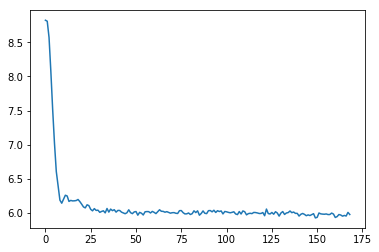

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   1 Batch    0/22   train_loss = 5.952
Epoch   1 Batch    1/22   train_loss = 5.954
Epoch   1 Batch    2/22   train_loss = 5.935
Epoch   1 Batch    3/22   train_loss = 5.959
Epoch   1 Batch    4/22   train_loss = 5.951
Epoch   1 Batch    5/22   train_loss = 5.953
Epoch   1 Batch    6/22   train_loss = 5.946
Epoch   1 Batch    7/22   train_loss = 6.001
Epoch   1 Batch    8/22   train_loss = 5.956
Epoch   1 Batch    9/22   train_loss = 5.947
Epoch   1 Batch   10/22   train_loss = 5.906
Epoch   1 Batch   11/22   train_loss = 5.959
Epoch   1 Batch   12/22   train_loss = 5.989
Epoch   1 Batch   13/22   train_loss = 5.943
Epoch   1 Batch   14/22   train_loss = 5.978
Epoch   1 Batch   15/22   train_loss = 5.921
Epoch   1 Batch   16/22   train_loss = 5.999
Epoch   1 Batch   17/22   train_loss = 5.957
Epoch   1 Batch   18/22   train_loss = 5.955
Epoch   1 Batch   19/22   train_loss = 5.962
Epoch   1 Batch   20/22   

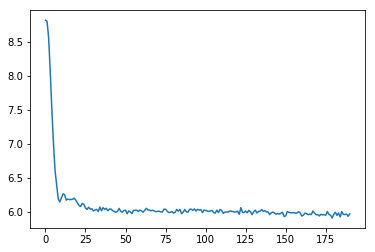

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   2 Batch    0/22   train_loss = 5.932
Epoch   2 Batch    1/22   train_loss = 5.942
Epoch   2 Batch    2/22   train_loss = 5.969
Epoch   2 Batch    3/22   train_loss = 5.938
Epoch   2 Batch    4/22   train_loss = 5.922
Epoch   2 Batch    5/22   train_loss = 5.922
Epoch   2 Batch    6/22   train_loss = 5.944
Epoch   2 Batch    7/22   train_loss = 5.913
Epoch   2 Batch    8/22   train_loss = 5.934
Epoch   2 Batch    9/22   train_loss = 5.935
Epoch   2 Batch   10/22   train_loss = 5.927
Epoch   2 Batch   11/22   train_loss = 5.885
Epoch   2 Batch   12/22   train_loss = 5.956
Epoch   2 Batch   13/22   train_loss = 5.913
Epoch   2 Batch   14/22   train_loss = 5.920
Epoch   2 Batch   15/22   train_loss = 5.951
Epoch   2 Batch   16/22   train_loss = 5.883
Epoch   2 Batch   17/22   train_loss = 5.885
Epoch   2 Batch   18/22   train_loss = 5.910
Epoch   2 Batch   19/22   train_loss = 5.945
Epoch   2 Batch   20/22   

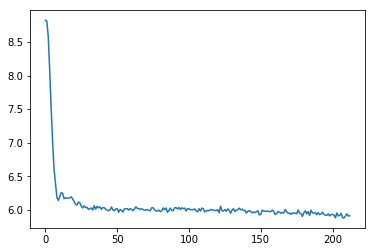

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   3 Batch    0/22   train_loss = 5.897
Epoch   3 Batch    1/22   train_loss = 5.916
Epoch   3 Batch    2/22   train_loss = 5.940
Epoch   3 Batch    3/22   train_loss = 5.877
Epoch   3 Batch    4/22   train_loss = 5.917
Epoch   3 Batch    5/22   train_loss = 5.877
Epoch   3 Batch    6/22   train_loss = 5.901
Epoch   3 Batch    7/22   train_loss = 5.878
Epoch   3 Batch    8/22   train_loss = 5.894
Epoch   3 Batch    9/22   train_loss = 5.872
Epoch   3 Batch   10/22   train_loss = 5.885
Epoch   3 Batch   11/22   train_loss = 5.902
Epoch   3 Batch   12/22   train_loss = 5.902
Epoch   3 Batch   13/22   train_loss = 5.904
Epoch   3 Batch   14/22   train_loss = 5.858
Epoch   3 Batch   15/22   train_loss = 5.949
Epoch   3 Batch   16/22   train_loss = 5.846
Epoch   3 Batch   17/22   train_loss = 5.932
Epoch   3 Batch   18/22   train_loss = 5.916
Epoch   3 Batch   19/22   train_loss = 5.867
Epoch   3 Batch   20/22   

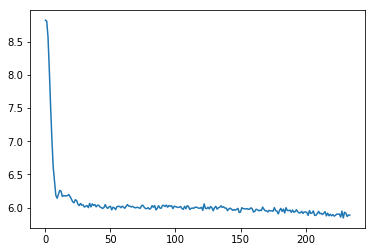

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   4 Batch    0/22   train_loss = 5.879
Epoch   4 Batch    1/22   train_loss = 5.887
Epoch   4 Batch    2/22   train_loss = 5.874
Epoch   4 Batch    3/22   train_loss = 5.911
Epoch   4 Batch    4/22   train_loss = 5.897
Epoch   4 Batch    5/22   train_loss = 5.859
Epoch   4 Batch    6/22   train_loss = 5.915
Epoch   4 Batch    7/22   train_loss = 5.872
Epoch   4 Batch    8/22   train_loss = 5.883
Epoch   4 Batch    9/22   train_loss = 5.878
Epoch   4 Batch   10/22   train_loss = 5.885
Epoch   4 Batch   11/22   train_loss = 5.860
Epoch   4 Batch   12/22   train_loss = 5.841
Epoch   4 Batch   13/22   train_loss = 5.845
Epoch   4 Batch   14/22   train_loss = 5.891
Epoch   4 Batch   15/22   train_loss = 5.866
Epoch   4 Batch   16/22   train_loss = 5.806
Epoch   4 Batch   17/22   train_loss = 5.885
Epoch   4 Batch   18/22   train_loss = 5.910
Epoch   4 Batch   19/22   train_loss = 5.890
Epoch   4 Batch   20/22   

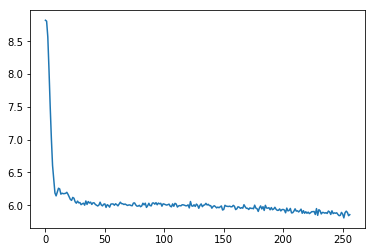

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   5 Batch    0/22   train_loss = 5.837
Epoch   5 Batch    1/22   train_loss = 5.856
Epoch   5 Batch    2/22   train_loss = 5.883
Epoch   5 Batch    3/22   train_loss = 5.859
Epoch   5 Batch    4/22   train_loss = 5.895
Epoch   5 Batch    5/22   train_loss = 5.872
Epoch   5 Batch    6/22   train_loss = 5.844
Epoch   5 Batch    7/22   train_loss = 5.857
Epoch   5 Batch    8/22   train_loss = 5.887
Epoch   5 Batch    9/22   train_loss = 5.839
Epoch   5 Batch   10/22   train_loss = 5.851
Epoch   5 Batch   11/22   train_loss = 5.881
Epoch   5 Batch   12/22   train_loss = 5.882
Epoch   5 Batch   13/22   train_loss = 5.840
Epoch   5 Batch   14/22   train_loss = 5.859
Epoch   5 Batch   15/22   train_loss = 5.872
Epoch   5 Batch   16/22   train_loss = 5.842
Epoch   5 Batch   17/22   train_loss = 5.850
Epoch   5 Batch   18/22   train_loss = 5.841
Epoch   5 Batch   19/22   train_loss = 5.890
Epoch   5 Batch   20/22   

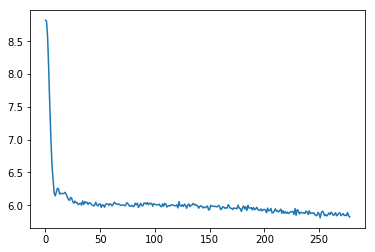

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   6 Batch    0/22   train_loss = 5.833
Epoch   6 Batch    1/22   train_loss = 5.846
Epoch   6 Batch    2/22   train_loss = 5.840
Epoch   6 Batch    3/22   train_loss = 5.822
Epoch   6 Batch    4/22   train_loss = 5.841
Epoch   6 Batch    5/22   train_loss = 5.840
Epoch   6 Batch    6/22   train_loss = 5.797
Epoch   6 Batch    7/22   train_loss = 5.837
Epoch   6 Batch    8/22   train_loss = 5.841
Epoch   6 Batch    9/22   train_loss = 5.869
Epoch   6 Batch   10/22   train_loss = 5.858
Epoch   6 Batch   11/22   train_loss = 5.856
Epoch   6 Batch   12/22   train_loss = 5.862
Epoch   6 Batch   13/22   train_loss = 5.865
Epoch   6 Batch   14/22   train_loss = 5.832
Epoch   6 Batch   15/22   train_loss = 5.860
Epoch   6 Batch   16/22   train_loss = 5.834
Epoch   6 Batch   17/22   train_loss = 5.841
Epoch   6 Batch   18/22   train_loss = 5.842
Epoch   6 Batch   19/22   train_loss = 5.839
Epoch   6 Batch   20/22   

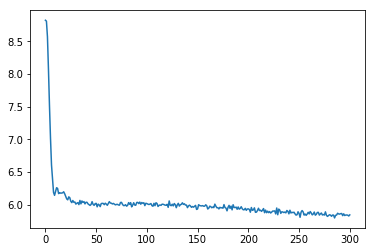

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   7 Batch    0/22   train_loss = 5.847
Epoch   7 Batch    1/22   train_loss = 5.825
Epoch   7 Batch    2/22   train_loss = 5.832
Epoch   7 Batch    3/22   train_loss = 5.828
Epoch   7 Batch    4/22   train_loss = 5.831
Epoch   7 Batch    5/22   train_loss = 5.794
Epoch   7 Batch    6/22   train_loss = 5.824
Epoch   7 Batch    7/22   train_loss = 5.833
Epoch   7 Batch    8/22   train_loss = 5.815
Epoch   7 Batch    9/22   train_loss = 5.838
Epoch   7 Batch   10/22   train_loss = 5.846
Epoch   7 Batch   11/22   train_loss = 5.850
Epoch   7 Batch   12/22   train_loss = 5.821
Epoch   7 Batch   13/22   train_loss = 5.766
Epoch   7 Batch   14/22   train_loss = 5.810
Epoch   7 Batch   15/22   train_loss = 5.827
Epoch   7 Batch   16/22   train_loss = 5.860
Epoch   7 Batch   17/22   train_loss = 5.783
Epoch   7 Batch   18/22   train_loss = 5.825
Epoch   7 Batch   19/22   train_loss = 5.817
Epoch   7 Batch   20/22   

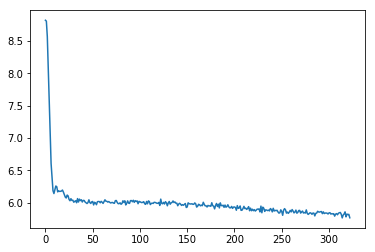

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   8 Batch    0/22   train_loss = 5.781
Epoch   8 Batch    1/22   train_loss = 5.837
Epoch   8 Batch    2/22   train_loss = 5.834
Epoch   8 Batch    3/22   train_loss = 5.783
Epoch   8 Batch    4/22   train_loss = 5.804
Epoch   8 Batch    5/22   train_loss = 5.802
Epoch   8 Batch    6/22   train_loss = 5.776
Epoch   8 Batch    7/22   train_loss = 5.838
Epoch   8 Batch    8/22   train_loss = 5.847
Epoch   8 Batch    9/22   train_loss = 5.835
Epoch   8 Batch   10/22   train_loss = 5.810
Epoch   8 Batch   11/22   train_loss = 5.806
Epoch   8 Batch   12/22   train_loss = 5.769
Epoch   8 Batch   13/22   train_loss = 5.807
Epoch   8 Batch   14/22   train_loss = 5.795
Epoch   8 Batch   15/22   train_loss = 5.823
Epoch   8 Batch   16/22   train_loss = 5.853
Epoch   8 Batch   17/22   train_loss = 5.805
Epoch   8 Batch   18/22   train_loss = 5.819
Epoch   8 Batch   19/22   train_loss = 5.790
Epoch   8 Batch   20/22   

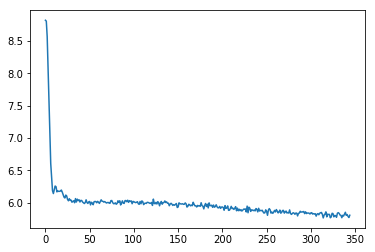

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch   9 Batch    0/22   train_loss = 5.799
Epoch   9 Batch    1/22   train_loss = 5.799
Epoch   9 Batch    2/22   train_loss = 5.785
Epoch   9 Batch    3/22   train_loss = 5.785
Epoch   9 Batch    4/22   train_loss = 5.822
Epoch   9 Batch    5/22   train_loss = 5.777
Epoch   9 Batch    6/22   train_loss = 5.782
Epoch   9 Batch    7/22   train_loss = 5.779
Epoch   9 Batch    8/22   train_loss = 5.813
Epoch   9 Batch    9/22   train_loss = 5.757
Epoch   9 Batch   10/22   train_loss = 5.752
Epoch   9 Batch   11/22   train_loss = 5.776
Epoch   9 Batch   12/22   train_loss = 5.784
Epoch   9 Batch   13/22   train_loss = 5.797
Epoch   9 Batch   14/22   train_loss = 5.797
Epoch   9 Batch   15/22   train_loss = 5.800
Epoch   9 Batch   16/22   train_loss = 5.765
Epoch   9 Batch   17/22   train_loss = 5.800
Epoch   9 Batch   18/22   train_loss = 5.778
Epoch   9 Batch   19/22   train_loss = 5.811
Epoch   9 Batch   20/22   

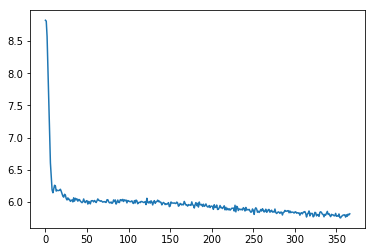

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  10 Batch    0/22   train_loss = 5.778
Epoch  10 Batch    1/22   train_loss = 5.778
Epoch  10 Batch    2/22   train_loss = 5.805
Epoch  10 Batch    3/22   train_loss = 5.785
Epoch  10 Batch    4/22   train_loss = 5.781
Epoch  10 Batch    5/22   train_loss = 5.781
Epoch  10 Batch    6/22   train_loss = 5.801
Epoch  10 Batch    7/22   train_loss = 5.766
Epoch  10 Batch    8/22   train_loss = 5.822
Epoch  10 Batch    9/22   train_loss = 5.753
Epoch  10 Batch   10/22   train_loss = 5.778
Epoch  10 Batch   11/22   train_loss = 5.756
Epoch  10 Batch   12/22   train_loss = 5.796
Epoch  10 Batch   13/22   train_loss = 5.798
Epoch  10 Batch   14/22   train_loss = 5.820
Epoch  10 Batch   15/22   train_loss = 5.765
Epoch  10 Batch   16/22   train_loss = 5.752
Epoch  10 Batch   17/22   train_loss = 5.770
Epoch  10 Batch   18/22   train_loss = 5.769
Epoch  10 Batch   19/22   train_loss = 5.784
Epoch  10 Batch   20/22   

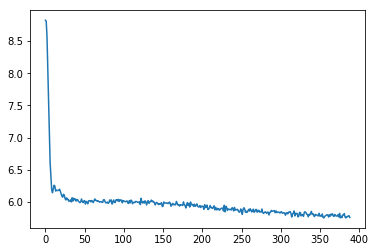

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  11 Batch    0/22   train_loss = 5.793
Epoch  11 Batch    1/22   train_loss = 5.778
Epoch  11 Batch    2/22   train_loss = 5.795
Epoch  11 Batch    3/22   train_loss = 5.762
Epoch  11 Batch    4/22   train_loss = 5.807
Epoch  11 Batch    5/22   train_loss = 5.770
Epoch  11 Batch    6/22   train_loss = 5.799
Epoch  11 Batch    7/22   train_loss = 5.786
Epoch  11 Batch    8/22   train_loss = 5.763
Epoch  11 Batch    9/22   train_loss = 5.761
Epoch  11 Batch   10/22   train_loss = 5.743
Epoch  11 Batch   11/22   train_loss = 5.810
Epoch  11 Batch   12/22   train_loss = 5.786
Epoch  11 Batch   13/22   train_loss = 5.770
Epoch  11 Batch   14/22   train_loss = 5.786
Epoch  11 Batch   15/22   train_loss = 5.756
Epoch  11 Batch   16/22   train_loss = 5.762
Epoch  11 Batch   17/22   train_loss = 5.715
Epoch  11 Batch   18/22   train_loss = 5.760
Epoch  11 Batch   19/22   train_loss = 5.790
Epoch  11 Batch   20/22   

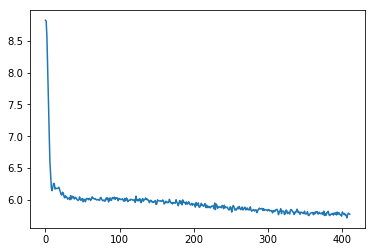

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  12 Batch    0/22   train_loss = 5.707
Epoch  12 Batch    1/22   train_loss = 5.767
Epoch  12 Batch    2/22   train_loss = 5.748
Epoch  12 Batch    3/22   train_loss = 5.747
Epoch  12 Batch    4/22   train_loss = 5.755
Epoch  12 Batch    5/22   train_loss = 5.801
Epoch  12 Batch    6/22   train_loss = 5.748
Epoch  12 Batch    7/22   train_loss = 5.779
Epoch  12 Batch    8/22   train_loss = 5.804
Epoch  12 Batch    9/22   train_loss = 5.768
Epoch  12 Batch   10/22   train_loss = 5.765
Epoch  12 Batch   11/22   train_loss = 5.804
Epoch  12 Batch   12/22   train_loss = 5.724
Epoch  12 Batch   13/22   train_loss = 5.778
Epoch  12 Batch   14/22   train_loss = 5.730
Epoch  12 Batch   15/22   train_loss = 5.730
Epoch  12 Batch   16/22   train_loss = 5.763
Epoch  12 Batch   17/22   train_loss = 5.744
Epoch  12 Batch   18/22   train_loss = 5.791
Epoch  12 Batch   19/22   train_loss = 5.725
Epoch  12 Batch   20/22   

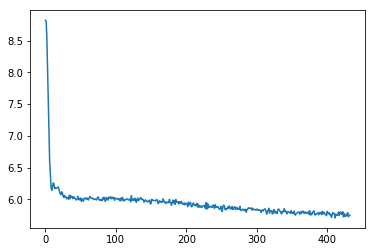

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  13 Batch    0/22   train_loss = 5.775
Epoch  13 Batch    1/22   train_loss = 5.761
Epoch  13 Batch    2/22   train_loss = 5.775
Epoch  13 Batch    3/22   train_loss = 5.755
Epoch  13 Batch    4/22   train_loss = 5.793
Epoch  13 Batch    5/22   train_loss = 5.762
Epoch  13 Batch    6/22   train_loss = 5.755
Epoch  13 Batch    7/22   train_loss = 5.739
Epoch  13 Batch    8/22   train_loss = 5.759
Epoch  13 Batch    9/22   train_loss = 5.723
Epoch  13 Batch   10/22   train_loss = 5.727
Epoch  13 Batch   11/22   train_loss = 5.750
Epoch  13 Batch   12/22   train_loss = 5.734
Epoch  13 Batch   13/22   train_loss = 5.687
Epoch  13 Batch   14/22   train_loss = 5.718
Epoch  13 Batch   15/22   train_loss = 5.744
Epoch  13 Batch   16/22   train_loss = 5.764
Epoch  13 Batch   17/22   train_loss = 5.721
Epoch  13 Batch   18/22   train_loss = 5.719
Epoch  13 Batch   19/22   train_loss = 5.797
Epoch  13 Batch   20/22   

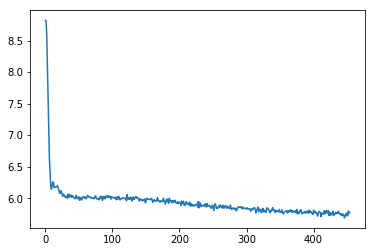

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  14 Batch    0/22   train_loss = 5.758
Epoch  14 Batch    1/22   train_loss = 5.752
Epoch  14 Batch    2/22   train_loss = 5.722
Epoch  14 Batch    3/22   train_loss = 5.724
Epoch  14 Batch    4/22   train_loss = 5.719
Epoch  14 Batch    5/22   train_loss = 5.787
Epoch  14 Batch    6/22   train_loss = 5.795
Epoch  14 Batch    7/22   train_loss = 5.772
Epoch  14 Batch    8/22   train_loss = 5.719
Epoch  14 Batch    9/22   train_loss = 5.735
Epoch  14 Batch   10/22   train_loss = 5.744
Epoch  14 Batch   11/22   train_loss = 5.748
Epoch  14 Batch   12/22   train_loss = 5.742
Epoch  14 Batch   13/22   train_loss = 5.755
Epoch  14 Batch   14/22   train_loss = 5.726
Epoch  14 Batch   15/22   train_loss = 5.728
Epoch  14 Batch   16/22   train_loss = 5.720
Epoch  14 Batch   17/22   train_loss = 5.778
Epoch  14 Batch   18/22   train_loss = 5.763
Epoch  14 Batch   19/22   train_loss = 5.752
Epoch  14 Batch   20/22   

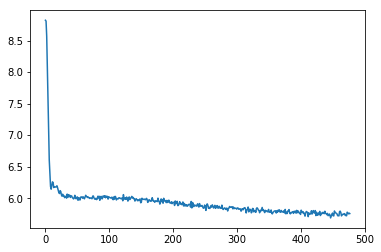

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  15 Batch    0/22   train_loss = 5.723
Epoch  15 Batch    1/22   train_loss = 5.727
Epoch  15 Batch    2/22   train_loss = 5.792
Epoch  15 Batch    3/22   train_loss = 5.739
Epoch  15 Batch    4/22   train_loss = 5.753
Epoch  15 Batch    5/22   train_loss = 5.706
Epoch  15 Batch    6/22   train_loss = 5.736
Epoch  15 Batch    7/22   train_loss = 5.810
Epoch  15 Batch    8/22   train_loss = 5.733
Epoch  15 Batch    9/22   train_loss = 5.741
Epoch  15 Batch   10/22   train_loss = 5.729
Epoch  15 Batch   11/22   train_loss = 5.731
Epoch  15 Batch   12/22   train_loss = 5.710
Epoch  15 Batch   13/22   train_loss = 5.720
Epoch  15 Batch   14/22   train_loss = 5.734
Epoch  15 Batch   15/22   train_loss = 5.727
Epoch  15 Batch   16/22   train_loss = 5.752
Epoch  15 Batch   17/22   train_loss = 5.723
Epoch  15 Batch   18/22   train_loss = 5.734
Epoch  15 Batch   19/22   train_loss = 5.709
Epoch  15 Batch   20/22   

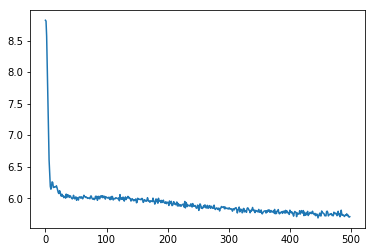

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  16 Batch    0/22   train_loss = 5.784
Epoch  16 Batch    1/22   train_loss = 5.729
Epoch  16 Batch    2/22   train_loss = 5.715
Epoch  16 Batch    3/22   train_loss = 5.751
Epoch  16 Batch    4/22   train_loss = 5.718
Epoch  16 Batch    5/22   train_loss = 5.713
Epoch  16 Batch    6/22   train_loss = 5.720
Epoch  16 Batch    7/22   train_loss = 5.746
Epoch  16 Batch    8/22   train_loss = 5.735
Epoch  16 Batch    9/22   train_loss = 5.682
Epoch  16 Batch   10/22   train_loss = 5.702
Epoch  16 Batch   11/22   train_loss = 5.728
Epoch  16 Batch   12/22   train_loss = 5.753
Epoch  16 Batch   13/22   train_loss = 5.754
Epoch  16 Batch   14/22   train_loss = 5.728
Epoch  16 Batch   15/22   train_loss = 5.717
Epoch  16 Batch   16/22   train_loss = 5.736
Epoch  16 Batch   17/22   train_loss = 5.693
Epoch  16 Batch   18/22   train_loss = 5.696
Epoch  16 Batch   19/22   train_loss = 5.714
Epoch  16 Batch   20/22   

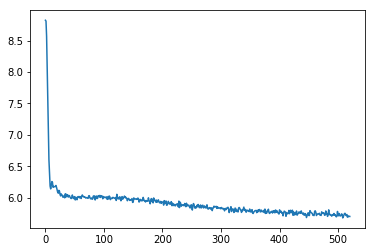

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  17 Batch    0/22   train_loss = 5.763
Epoch  17 Batch    1/22   train_loss = 5.711
Epoch  17 Batch    2/22   train_loss = 5.736
Epoch  17 Batch    3/22   train_loss = 5.723
Epoch  17 Batch    4/22   train_loss = 5.748
Epoch  17 Batch    5/22   train_loss = 5.682
Epoch  17 Batch    6/22   train_loss = 5.750
Epoch  17 Batch    7/22   train_loss = 5.721
Epoch  17 Batch    8/22   train_loss = 5.727
Epoch  17 Batch    9/22   train_loss = 5.752
Epoch  17 Batch   10/22   train_loss = 5.715
Epoch  17 Batch   11/22   train_loss = 5.699
Epoch  17 Batch   12/22   train_loss = 5.739
Epoch  17 Batch   13/22   train_loss = 5.714
Epoch  17 Batch   14/22   train_loss = 5.739
Epoch  17 Batch   15/22   train_loss = 5.726
Epoch  17 Batch   16/22   train_loss = 5.712
Epoch  17 Batch   17/22   train_loss = 5.713
Epoch  17 Batch   18/22   train_loss = 5.709
Epoch  17 Batch   19/22   train_loss = 5.712
Epoch  17 Batch   20/22   

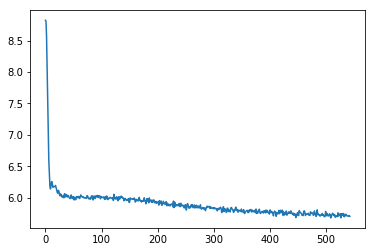

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  18 Batch    0/22   train_loss = 5.697
Epoch  18 Batch    1/22   train_loss = 5.689
Epoch  18 Batch    2/22   train_loss = 5.744
Epoch  18 Batch    3/22   train_loss = 5.699
Epoch  18 Batch    4/22   train_loss = 5.721
Epoch  18 Batch    5/22   train_loss = 5.691
Epoch  18 Batch    6/22   train_loss = 5.724
Epoch  18 Batch    7/22   train_loss = 5.734
Epoch  18 Batch    8/22   train_loss = 5.691
Epoch  18 Batch    9/22   train_loss = 5.710
Epoch  18 Batch   10/22   train_loss = 5.752
Epoch  18 Batch   11/22   train_loss = 5.697
Epoch  18 Batch   12/22   train_loss = 5.710
Epoch  18 Batch   13/22   train_loss = 5.707
Epoch  18 Batch   14/22   train_loss = 5.719
Epoch  18 Batch   15/22   train_loss = 5.691
Epoch  18 Batch   16/22   train_loss = 5.710
Epoch  18 Batch   17/22   train_loss = 5.697
Epoch  18 Batch   18/22   train_loss = 5.686
Epoch  18 Batch   19/22   train_loss = 5.694
Epoch  18 Batch   20/22   

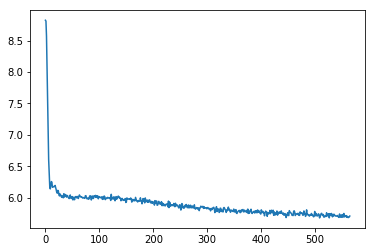

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  19 Batch    0/22   train_loss = 5.695
Epoch  19 Batch    1/22   train_loss = 5.736
Epoch  19 Batch    2/22   train_loss = 5.732
Epoch  19 Batch    3/22   train_loss = 5.703
Epoch  19 Batch    4/22   train_loss = 5.703
Epoch  19 Batch    5/22   train_loss = 5.712
Epoch  19 Batch    6/22   train_loss = 5.718
Epoch  19 Batch    7/22   train_loss = 5.701
Epoch  19 Batch    8/22   train_loss = 5.670
Epoch  19 Batch    9/22   train_loss = 5.689
Epoch  19 Batch   10/22   train_loss = 5.687
Epoch  19 Batch   11/22   train_loss = 5.700
Epoch  19 Batch   12/22   train_loss = 5.712
Epoch  19 Batch   13/22   train_loss = 5.695
Epoch  19 Batch   14/22   train_loss = 5.702
Epoch  19 Batch   15/22   train_loss = 5.685
Epoch  19 Batch   16/22   train_loss = 5.708
Epoch  19 Batch   17/22   train_loss = 5.672
Epoch  19 Batch   18/22   train_loss = 5.736
Epoch  19 Batch   19/22   train_loss = 5.733
Epoch  19 Batch   20/22   

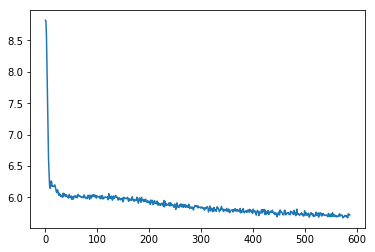

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  20 Batch    0/22   train_loss = 5.713
Epoch  20 Batch    1/22   train_loss = 5.662
Epoch  20 Batch    2/22   train_loss = 5.686
Epoch  20 Batch    3/22   train_loss = 5.709
Epoch  20 Batch    4/22   train_loss = 5.750
Epoch  20 Batch    5/22   train_loss = 5.703
Epoch  20 Batch    6/22   train_loss = 5.652
Epoch  20 Batch    7/22   train_loss = 5.694
Epoch  20 Batch    8/22   train_loss = 5.695
Epoch  20 Batch    9/22   train_loss = 5.669
Epoch  20 Batch   10/22   train_loss = 5.695
Epoch  20 Batch   11/22   train_loss = 5.709
Epoch  20 Batch   12/22   train_loss = 5.698
Epoch  20 Batch   13/22   train_loss = 5.710
Epoch  20 Batch   14/22   train_loss = 5.728
Epoch  20 Batch   15/22   train_loss = 5.704
Epoch  20 Batch   16/22   train_loss = 5.702
Epoch  20 Batch   17/22   train_loss = 5.692
Epoch  20 Batch   18/22   train_loss = 5.727
Epoch  20 Batch   19/22   train_loss = 5.702
Epoch  20 Batch   20/22   

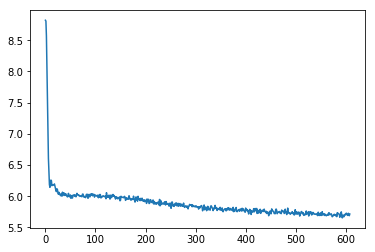

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  21 Batch    0/22   train_loss = 5.657
Epoch  21 Batch    1/22   train_loss = 5.672
Epoch  21 Batch    2/22   train_loss = 5.701
Epoch  21 Batch    3/22   train_loss = 5.717
Epoch  21 Batch    4/22   train_loss = 5.705
Epoch  21 Batch    5/22   train_loss = 5.704
Epoch  21 Batch    6/22   train_loss = 5.656
Epoch  21 Batch    7/22   train_loss = 5.672
Epoch  21 Batch    8/22   train_loss = 5.672
Epoch  21 Batch    9/22   train_loss = 5.707
Epoch  21 Batch   10/22   train_loss = 5.656
Epoch  21 Batch   11/22   train_loss = 5.697
Epoch  21 Batch   12/22   train_loss = 5.705
Epoch  21 Batch   13/22   train_loss = 5.682
Epoch  21 Batch   14/22   train_loss = 5.701
Epoch  21 Batch   15/22   train_loss = 5.642
Epoch  21 Batch   16/22   train_loss = 5.679
Epoch  21 Batch   17/22   train_loss = 5.682
Epoch  21 Batch   18/22   train_loss = 5.685
Epoch  21 Batch   19/22   train_loss = 5.703
Epoch  21 Batch   20/22   

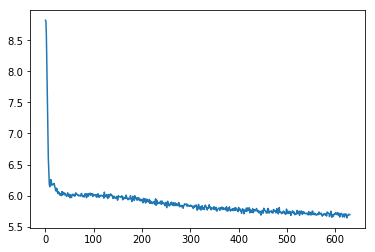

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  22 Batch    0/22   train_loss = 5.669
Epoch  22 Batch    1/22   train_loss = 5.703
Epoch  22 Batch    2/22   train_loss = 5.659
Epoch  22 Batch    3/22   train_loss = 5.675
Epoch  22 Batch    4/22   train_loss = 5.666
Epoch  22 Batch    5/22   train_loss = 5.664
Epoch  22 Batch    6/22   train_loss = 5.701
Epoch  22 Batch    7/22   train_loss = 5.674
Epoch  22 Batch    8/22   train_loss = 5.719
Epoch  22 Batch    9/22   train_loss = 5.695
Epoch  22 Batch   10/22   train_loss = 5.670
Epoch  22 Batch   11/22   train_loss = 5.668
Epoch  22 Batch   12/22   train_loss = 5.637
Epoch  22 Batch   13/22   train_loss = 5.663
Epoch  22 Batch   14/22   train_loss = 5.701
Epoch  22 Batch   15/22   train_loss = 5.687
Epoch  22 Batch   16/22   train_loss = 5.683
Epoch  22 Batch   17/22   train_loss = 5.703
Epoch  22 Batch   18/22   train_loss = 5.695
Epoch  22 Batch   19/22   train_loss = 5.677
Epoch  22 Batch   20/22   

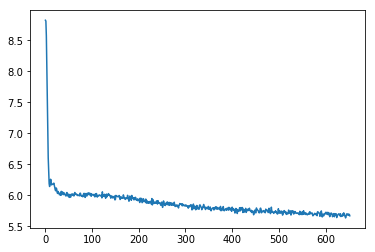

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  23 Batch    0/22   train_loss = 5.665
Epoch  23 Batch    1/22   train_loss = 5.672
Epoch  23 Batch    2/22   train_loss = 5.654
Epoch  23 Batch    3/22   train_loss = 5.642
Epoch  23 Batch    4/22   train_loss = 5.645
Epoch  23 Batch    5/22   train_loss = 5.693
Epoch  23 Batch    6/22   train_loss = 5.657
Epoch  23 Batch    7/22   train_loss = 5.698
Epoch  23 Batch    8/22   train_loss = 5.656
Epoch  23 Batch    9/22   train_loss = 5.643
Epoch  23 Batch   10/22   train_loss = 5.681
Epoch  23 Batch   11/22   train_loss = 5.671
Epoch  23 Batch   12/22   train_loss = 5.660
Epoch  23 Batch   13/22   train_loss = 5.657
Epoch  23 Batch   14/22   train_loss = 5.677
Epoch  23 Batch   15/22   train_loss = 5.685
Epoch  23 Batch   16/22   train_loss = 5.688
Epoch  23 Batch   17/22   train_loss = 5.645
Epoch  23 Batch   18/22   train_loss = 5.661
Epoch  23 Batch   19/22   train_loss = 5.672
Epoch  23 Batch   20/22   

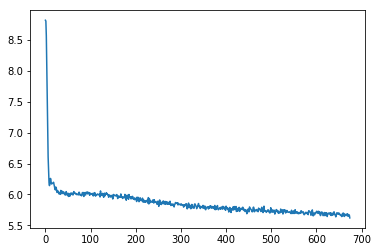

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  24 Batch    0/22   train_loss = 5.615
Epoch  24 Batch    1/22   train_loss = 5.647
Epoch  24 Batch    2/22   train_loss = 5.689
Epoch  24 Batch    3/22   train_loss = 5.685
Epoch  24 Batch    4/22   train_loss = 5.627
Epoch  24 Batch    5/22   train_loss = 5.651
Epoch  24 Batch    6/22   train_loss = 5.675
Epoch  24 Batch    7/22   train_loss = 5.660
Epoch  24 Batch    8/22   train_loss = 5.681
Epoch  24 Batch    9/22   train_loss = 5.627
Epoch  24 Batch   10/22   train_loss = 5.660
Epoch  24 Batch   11/22   train_loss = 5.688
Epoch  24 Batch   12/22   train_loss = 5.621
Epoch  24 Batch   13/22   train_loss = 5.630
Epoch  24 Batch   14/22   train_loss = 5.657
Epoch  24 Batch   15/22   train_loss = 5.680
Epoch  24 Batch   16/22   train_loss = 5.671
Epoch  24 Batch   17/22   train_loss = 5.673
Epoch  24 Batch   18/22   train_loss = 5.709
Epoch  24 Batch   19/22   train_loss = 5.649
Epoch  24 Batch   20/22   

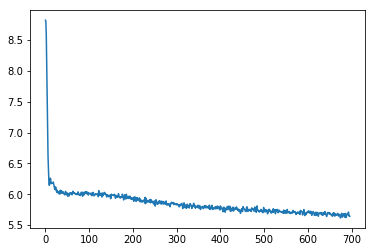

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  25 Batch    0/22   train_loss = 5.671
Epoch  25 Batch    1/22   train_loss = 5.702
Epoch  25 Batch    2/22   train_loss = 5.703
Epoch  25 Batch    3/22   train_loss = 5.661
Epoch  25 Batch    4/22   train_loss = 5.570
Epoch  25 Batch    5/22   train_loss = 5.667
Epoch  25 Batch    6/22   train_loss = 5.675
Epoch  25 Batch    7/22   train_loss = 5.663
Epoch  25 Batch    8/22   train_loss = 5.659
Epoch  25 Batch    9/22   train_loss = 5.652
Epoch  25 Batch   10/22   train_loss = 5.649
Epoch  25 Batch   11/22   train_loss = 5.618
Epoch  25 Batch   12/22   train_loss = 5.668
Epoch  25 Batch   13/22   train_loss = 5.665
Epoch  25 Batch   14/22   train_loss = 5.640
Epoch  25 Batch   15/22   train_loss = 5.647
Epoch  25 Batch   16/22   train_loss = 5.637
Epoch  25 Batch   17/22   train_loss = 5.662
Epoch  25 Batch   18/22   train_loss = 5.667
Epoch  25 Batch   19/22   train_loss = 5.633
Epoch  25 Batch   20/22   

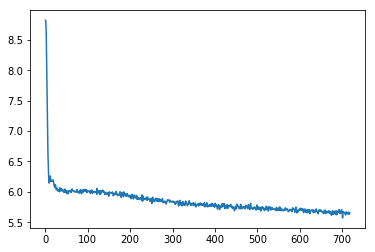

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  26 Batch    0/22   train_loss = 5.667
Epoch  26 Batch    1/22   train_loss = 5.656
Epoch  26 Batch    2/22   train_loss = 5.627
Epoch  26 Batch    3/22   train_loss = 5.692
Epoch  26 Batch    4/22   train_loss = 5.659
Epoch  26 Batch    5/22   train_loss = 5.661
Epoch  26 Batch    6/22   train_loss = 5.596
Epoch  26 Batch    7/22   train_loss = 5.625
Epoch  26 Batch    8/22   train_loss = 5.687
Epoch  26 Batch    9/22   train_loss = 5.677
Epoch  26 Batch   10/22   train_loss = 5.692
Epoch  26 Batch   11/22   train_loss = 5.631
Epoch  26 Batch   12/22   train_loss = 5.616
Epoch  26 Batch   13/22   train_loss = 5.667
Epoch  26 Batch   14/22   train_loss = 5.679
Epoch  26 Batch   15/22   train_loss = 5.636
Epoch  26 Batch   16/22   train_loss = 5.617
Epoch  26 Batch   17/22   train_loss = 5.631
Epoch  26 Batch   18/22   train_loss = 5.635
Epoch  26 Batch   19/22   train_loss = 5.619
Epoch  26 Batch   20/22   

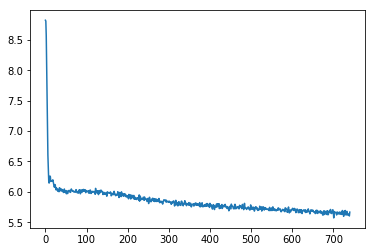

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  27 Batch    0/22   train_loss = 5.614
Epoch  27 Batch    1/22   train_loss = 5.633
Epoch  27 Batch    2/22   train_loss = 5.621
Epoch  27 Batch    3/22   train_loss = 5.632
Epoch  27 Batch    4/22   train_loss = 5.616
Epoch  27 Batch    5/22   train_loss = 5.626
Epoch  27 Batch    6/22   train_loss = 5.637
Epoch  27 Batch    7/22   train_loss = 5.649
Epoch  27 Batch    8/22   train_loss = 5.643
Epoch  27 Batch    9/22   train_loss = 5.633
Epoch  27 Batch   10/22   train_loss = 5.638
Epoch  27 Batch   11/22   train_loss = 5.627
Epoch  27 Batch   12/22   train_loss = 5.595
Epoch  27 Batch   13/22   train_loss = 5.591
Epoch  27 Batch   14/22   train_loss = 5.656
Epoch  27 Batch   15/22   train_loss = 5.668
Epoch  27 Batch   16/22   train_loss = 5.629
Epoch  27 Batch   17/22   train_loss = 5.611
Epoch  27 Batch   18/22   train_loss = 5.609
Epoch  27 Batch   19/22   train_loss = 5.618
Epoch  27 Batch   20/22   

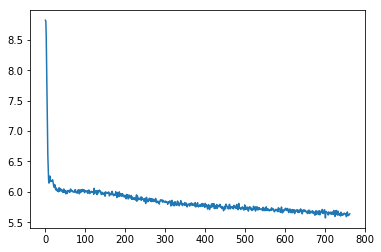

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  28 Batch    0/22   train_loss = 5.653
Epoch  28 Batch    1/22   train_loss = 5.709
Epoch  28 Batch    2/22   train_loss = 5.631
Epoch  28 Batch    3/22   train_loss = 5.626
Epoch  28 Batch    4/22   train_loss = 5.595
Epoch  28 Batch    5/22   train_loss = 5.596
Epoch  28 Batch    6/22   train_loss = 5.641
Epoch  28 Batch    7/22   train_loss = 5.591
Epoch  28 Batch    8/22   train_loss = 5.660
Epoch  28 Batch    9/22   train_loss = 5.625
Epoch  28 Batch   10/22   train_loss = 5.622
Epoch  28 Batch   11/22   train_loss = 5.623
Epoch  28 Batch   12/22   train_loss = 5.610
Epoch  28 Batch   13/22   train_loss = 5.637
Epoch  28 Batch   14/22   train_loss = 5.571
Epoch  28 Batch   15/22   train_loss = 5.603
Epoch  28 Batch   16/22   train_loss = 5.648
Epoch  28 Batch   17/22   train_loss = 5.573
Epoch  28 Batch   18/22   train_loss = 5.596
Epoch  28 Batch   19/22   train_loss = 5.605
Epoch  28 Batch   20/22   

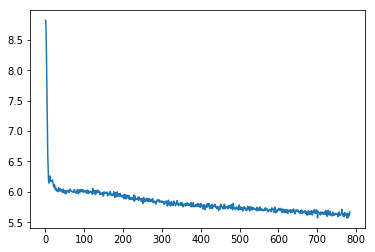

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  29 Batch    0/22   train_loss = 5.663
Epoch  29 Batch    1/22   train_loss = 5.657
Epoch  29 Batch    2/22   train_loss = 5.628
Epoch  29 Batch    3/22   train_loss = 5.579
Epoch  29 Batch    4/22   train_loss = 5.611
Epoch  29 Batch    5/22   train_loss = 5.585
Epoch  29 Batch    6/22   train_loss = 5.634
Epoch  29 Batch    7/22   train_loss = 5.621
Epoch  29 Batch    8/22   train_loss = 5.641
Epoch  29 Batch    9/22   train_loss = 5.601
Epoch  29 Batch   10/22   train_loss = 5.582
Epoch  29 Batch   11/22   train_loss = 5.590
Epoch  29 Batch   12/22   train_loss = 5.631
Epoch  29 Batch   13/22   train_loss = 5.635
Epoch  29 Batch   14/22   train_loss = 5.582
Epoch  29 Batch   15/22   train_loss = 5.593
Epoch  29 Batch   16/22   train_loss = 5.613
Epoch  29 Batch   17/22   train_loss = 5.600
Epoch  29 Batch   18/22   train_loss = 5.593
Epoch  29 Batch   19/22   train_loss = 5.613
Epoch  29 Batch   20/22   

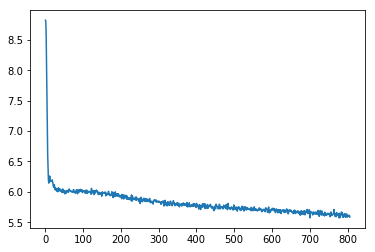

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  30 Batch    0/22   train_loss = 5.580
Epoch  30 Batch    1/22   train_loss = 5.591
Epoch  30 Batch    2/22   train_loss = 5.610
Epoch  30 Batch    3/22   train_loss = 5.598
Epoch  30 Batch    4/22   train_loss = 5.588
Epoch  30 Batch    5/22   train_loss = 5.626
Epoch  30 Batch    6/22   train_loss = 5.606
Epoch  30 Batch    7/22   train_loss = 5.565
Epoch  30 Batch    8/22   train_loss = 5.627
Epoch  30 Batch    9/22   train_loss = 5.576
Epoch  30 Batch   10/22   train_loss = 5.624
Epoch  30 Batch   11/22   train_loss = 5.605
Epoch  30 Batch   12/22   train_loss = 5.565
Epoch  30 Batch   13/22   train_loss = 5.566
Epoch  30 Batch   14/22   train_loss = 5.583
Epoch  30 Batch   15/22   train_loss = 5.607
Epoch  30 Batch   16/22   train_loss = 5.548
Epoch  30 Batch   17/22   train_loss = 5.592
Epoch  30 Batch   18/22   train_loss = 5.600
Epoch  30 Batch   19/22   train_loss = 5.563
Epoch  30 Batch   20/22   

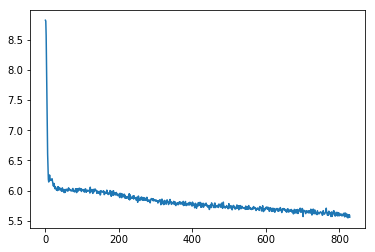

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  31 Batch    0/22   train_loss = 5.591
Epoch  31 Batch    1/22   train_loss = 5.623
Epoch  31 Batch    2/22   train_loss = 5.620
Epoch  31 Batch    3/22   train_loss = 5.599
Epoch  31 Batch    4/22   train_loss = 5.608
Epoch  31 Batch    5/22   train_loss = 5.615
Epoch  31 Batch    6/22   train_loss = 5.529
Epoch  31 Batch    7/22   train_loss = 5.571
Epoch  31 Batch    8/22   train_loss = 5.573
Epoch  31 Batch    9/22   train_loss = 5.587
Epoch  31 Batch   10/22   train_loss = 5.536
Epoch  31 Batch   11/22   train_loss = 5.517
Epoch  31 Batch   12/22   train_loss = 5.553
Epoch  31 Batch   13/22   train_loss = 5.572
Epoch  31 Batch   14/22   train_loss = 5.557
Epoch  31 Batch   15/22   train_loss = 5.532
Epoch  31 Batch   16/22   train_loss = 5.564
Epoch  31 Batch   17/22   train_loss = 5.587
Epoch  31 Batch   18/22   train_loss = 5.573
Epoch  31 Batch   19/22   train_loss = 5.554
Epoch  31 Batch   20/22   

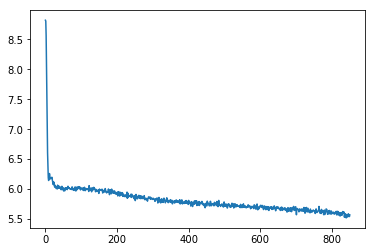

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  32 Batch    0/22   train_loss = 5.550
Epoch  32 Batch    1/22   train_loss = 5.566
Epoch  32 Batch    2/22   train_loss = 5.576
Epoch  32 Batch    3/22   train_loss = 5.577
Epoch  32 Batch    4/22   train_loss = 5.604
Epoch  32 Batch    5/22   train_loss = 5.567
Epoch  32 Batch    6/22   train_loss = 5.570
Epoch  32 Batch    7/22   train_loss = 5.547
Epoch  32 Batch    8/22   train_loss = 5.576
Epoch  32 Batch    9/22   train_loss = 5.554
Epoch  32 Batch   10/22   train_loss = 5.554
Epoch  32 Batch   11/22   train_loss = 5.570
Epoch  32 Batch   12/22   train_loss = 5.574
Epoch  32 Batch   13/22   train_loss = 5.538
Epoch  32 Batch   14/22   train_loss = 5.535
Epoch  32 Batch   15/22   train_loss = 5.561
Epoch  32 Batch   16/22   train_loss = 5.546
Epoch  32 Batch   17/22   train_loss = 5.558
Epoch  32 Batch   18/22   train_loss = 5.575
Epoch  32 Batch   19/22   train_loss = 5.541
Epoch  32 Batch   20/22   

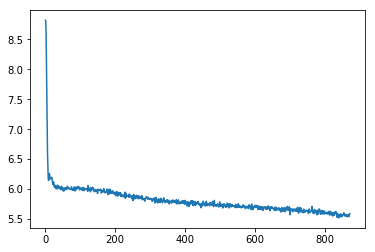

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  33 Batch    0/22   train_loss = 5.506
Epoch  33 Batch    1/22   train_loss = 5.572
Epoch  33 Batch    2/22   train_loss = 5.525
Epoch  33 Batch    3/22   train_loss = 5.558
Epoch  33 Batch    4/22   train_loss = 5.593
Epoch  33 Batch    5/22   train_loss = 5.583
Epoch  33 Batch    6/22   train_loss = 5.568
Epoch  33 Batch    7/22   train_loss = 5.610
Epoch  33 Batch    8/22   train_loss = 5.585
Epoch  33 Batch    9/22   train_loss = 5.533
Epoch  33 Batch   10/22   train_loss = 5.551
Epoch  33 Batch   11/22   train_loss = 5.549
Epoch  33 Batch   12/22   train_loss = 5.546
Epoch  33 Batch   13/22   train_loss = 5.565
Epoch  33 Batch   14/22   train_loss = 5.535
Epoch  33 Batch   15/22   train_loss = 5.534
Epoch  33 Batch   16/22   train_loss = 5.559
Epoch  33 Batch   17/22   train_loss = 5.558
Epoch  33 Batch   18/22   train_loss = 5.567
Epoch  33 Batch   19/22   train_loss = 5.539
Epoch  33 Batch   20/22   

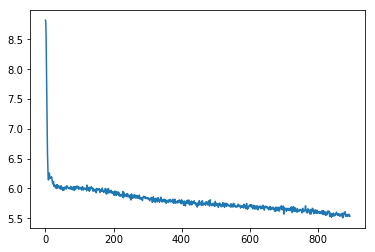

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  34 Batch    0/22   train_loss = 5.522
Epoch  34 Batch    1/22   train_loss = 5.565
Epoch  34 Batch    2/22   train_loss = 5.562
Epoch  34 Batch    3/22   train_loss = 5.587
Epoch  34 Batch    4/22   train_loss = 5.541
Epoch  34 Batch    5/22   train_loss = 5.556
Epoch  34 Batch    6/22   train_loss = 5.567
Epoch  34 Batch    7/22   train_loss = 5.531
Epoch  34 Batch    8/22   train_loss = 5.542
Epoch  34 Batch    9/22   train_loss = 5.503
Epoch  34 Batch   10/22   train_loss = 5.524
Epoch  34 Batch   11/22   train_loss = 5.540
Epoch  34 Batch   12/22   train_loss = 5.532
Epoch  34 Batch   13/22   train_loss = 5.508
Epoch  34 Batch   14/22   train_loss = 5.527
Epoch  34 Batch   15/22   train_loss = 5.520
Epoch  34 Batch   16/22   train_loss = 5.516
Epoch  34 Batch   17/22   train_loss = 5.490
Epoch  34 Batch   18/22   train_loss = 5.497
Epoch  34 Batch   19/22   train_loss = 5.549
Epoch  34 Batch   20/22   

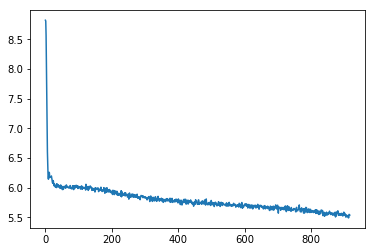

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  35 Batch    0/22   train_loss = 5.512
Epoch  35 Batch    1/22   train_loss = 5.559
Epoch  35 Batch    2/22   train_loss = 5.515
Epoch  35 Batch    3/22   train_loss = 5.538
Epoch  35 Batch    4/22   train_loss = 5.515
Epoch  35 Batch    5/22   train_loss = 5.503
Epoch  35 Batch    6/22   train_loss = 5.532
Epoch  35 Batch    7/22   train_loss = 5.567
Epoch  35 Batch    8/22   train_loss = 5.549
Epoch  35 Batch    9/22   train_loss = 5.524
Epoch  35 Batch   10/22   train_loss = 5.512
Epoch  35 Batch   11/22   train_loss = 5.536
Epoch  35 Batch   12/22   train_loss = 5.522
Epoch  35 Batch   13/22   train_loss = 5.484
Epoch  35 Batch   14/22   train_loss = 5.493
Epoch  35 Batch   15/22   train_loss = 5.530
Epoch  35 Batch   16/22   train_loss = 5.530
Epoch  35 Batch   17/22   train_loss = 5.517
Epoch  35 Batch   18/22   train_loss = 5.474
Epoch  35 Batch   19/22   train_loss = 5.527
Epoch  35 Batch   20/22   

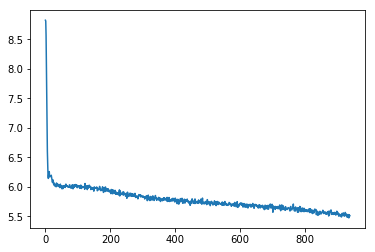

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  36 Batch    0/22   train_loss = 5.480
Epoch  36 Batch    1/22   train_loss = 5.550
Epoch  36 Batch    2/22   train_loss = 5.508
Epoch  36 Batch    3/22   train_loss = 5.490
Epoch  36 Batch    4/22   train_loss = 5.520
Epoch  36 Batch    5/22   train_loss = 5.532
Epoch  36 Batch    6/22   train_loss = 5.519
Epoch  36 Batch    7/22   train_loss = 5.470
Epoch  36 Batch    8/22   train_loss = 5.540
Epoch  36 Batch    9/22   train_loss = 5.485
Epoch  36 Batch   10/22   train_loss = 5.496
Epoch  36 Batch   11/22   train_loss = 5.521
Epoch  36 Batch   12/22   train_loss = 5.530
Epoch  36 Batch   13/22   train_loss = 5.547
Epoch  36 Batch   14/22   train_loss = 5.475
Epoch  36 Batch   15/22   train_loss = 5.488
Epoch  36 Batch   16/22   train_loss = 5.489
Epoch  36 Batch   17/22   train_loss = 5.501
Epoch  36 Batch   18/22   train_loss = 5.485
Epoch  36 Batch   19/22   train_loss = 5.490
Epoch  36 Batch   20/22   

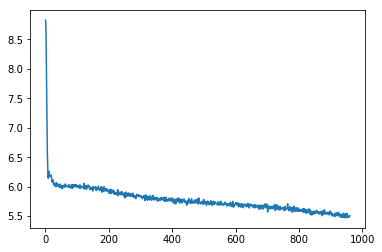

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  37 Batch    0/22   train_loss = 5.514
Epoch  37 Batch    1/22   train_loss = 5.476
Epoch  37 Batch    2/22   train_loss = 5.486
Epoch  37 Batch    3/22   train_loss = 5.492
Epoch  37 Batch    4/22   train_loss = 5.497
Epoch  37 Batch    5/22   train_loss = 5.497
Epoch  37 Batch    6/22   train_loss = 5.495
Epoch  37 Batch    7/22   train_loss = 5.479
Epoch  37 Batch    8/22   train_loss = 5.484
Epoch  37 Batch    9/22   train_loss = 5.497
Epoch  37 Batch   10/22   train_loss = 5.477
Epoch  37 Batch   11/22   train_loss = 5.530
Epoch  37 Batch   12/22   train_loss = 5.520
Epoch  37 Batch   13/22   train_loss = 5.512
Epoch  37 Batch   14/22   train_loss = 5.521
Epoch  37 Batch   15/22   train_loss = 5.535
Epoch  37 Batch   16/22   train_loss = 5.506
Epoch  37 Batch   17/22   train_loss = 5.512
Epoch  37 Batch   18/22   train_loss = 5.505
Epoch  37 Batch   19/22   train_loss = 5.542
Epoch  37 Batch   20/22   

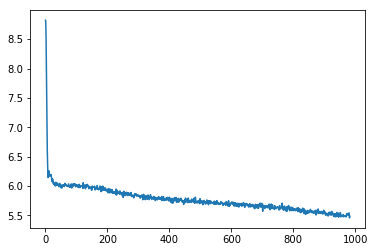

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  38 Batch    0/22   train_loss = 5.540
Epoch  38 Batch    1/22   train_loss = 5.510
Epoch  38 Batch    2/22   train_loss = 5.499
Epoch  38 Batch    3/22   train_loss = 5.489
Epoch  38 Batch    4/22   train_loss = 5.450
Epoch  38 Batch    5/22   train_loss = 5.469
Epoch  38 Batch    6/22   train_loss = 5.509
Epoch  38 Batch    7/22   train_loss = 5.464
Epoch  38 Batch    8/22   train_loss = 5.499
Epoch  38 Batch    9/22   train_loss = 5.442
Epoch  38 Batch   10/22   train_loss = 5.525
Epoch  38 Batch   11/22   train_loss = 5.474
Epoch  38 Batch   12/22   train_loss = 5.470
Epoch  38 Batch   13/22   train_loss = 5.501
Epoch  38 Batch   14/22   train_loss = 5.491
Epoch  38 Batch   15/22   train_loss = 5.446
Epoch  38 Batch   16/22   train_loss = 5.512
Epoch  38 Batch   17/22   train_loss = 5.500
Epoch  38 Batch   18/22   train_loss = 5.491
Epoch  38 Batch   19/22   train_loss = 5.491
Epoch  38 Batch   20/22   

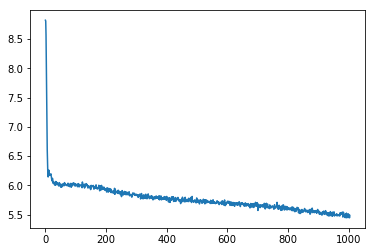

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  39 Batch    0/22   train_loss = 5.452
Epoch  39 Batch    1/22   train_loss = 5.459
Epoch  39 Batch    2/22   train_loss = 5.501
Epoch  39 Batch    3/22   train_loss = 5.434
Epoch  39 Batch    4/22   train_loss = 5.479
Epoch  39 Batch    5/22   train_loss = 5.441
Epoch  39 Batch    6/22   train_loss = 5.471
Epoch  39 Batch    7/22   train_loss = 5.475
Epoch  39 Batch    8/22   train_loss = 5.477
Epoch  39 Batch    9/22   train_loss = 5.493
Epoch  39 Batch   10/22   train_loss = 5.479
Epoch  39 Batch   11/22   train_loss = 5.468
Epoch  39 Batch   12/22   train_loss = 5.487
Epoch  39 Batch   13/22   train_loss = 5.483
Epoch  39 Batch   14/22   train_loss = 5.458
Epoch  39 Batch   15/22   train_loss = 5.512
Epoch  39 Batch   16/22   train_loss = 5.429
Epoch  39 Batch   17/22   train_loss = 5.451
Epoch  39 Batch   18/22   train_loss = 5.479
Epoch  39 Batch   19/22   train_loss = 5.453
Epoch  39 Batch   20/22   

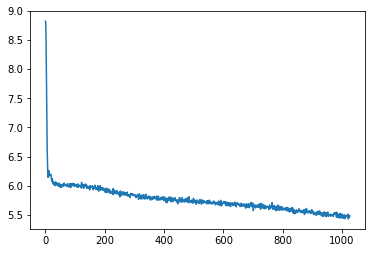

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  40 Batch    0/22   train_loss = 5.517
Epoch  40 Batch    1/22   train_loss = 5.469
Epoch  40 Batch    2/22   train_loss = 5.488
Epoch  40 Batch    3/22   train_loss = 5.434
Epoch  40 Batch    4/22   train_loss = 5.541
Epoch  40 Batch    5/22   train_loss = 5.452
Epoch  40 Batch    6/22   train_loss = 5.478
Epoch  40 Batch    7/22   train_loss = 5.428
Epoch  40 Batch    8/22   train_loss = 5.468
Epoch  40 Batch    9/22   train_loss = 5.440
Epoch  40 Batch   10/22   train_loss = 5.440
Epoch  40 Batch   11/22   train_loss = 5.462
Epoch  40 Batch   12/22   train_loss = 5.448
Epoch  40 Batch   13/22   train_loss = 5.458
Epoch  40 Batch   14/22   train_loss = 5.438
Epoch  40 Batch   15/22   train_loss = 5.438
Epoch  40 Batch   16/22   train_loss = 5.507
Epoch  40 Batch   17/22   train_loss = 5.461
Epoch  40 Batch   18/22   train_loss = 5.478
Epoch  40 Batch   19/22   train_loss = 5.421
Epoch  40 Batch   20/22   

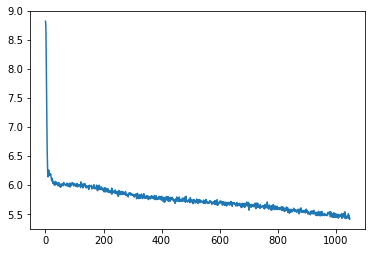

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  41 Batch    0/22   train_loss = 5.487
Epoch  41 Batch    1/22   train_loss = 5.439
Epoch  41 Batch    2/22   train_loss = 5.404
Epoch  41 Batch    3/22   train_loss = 5.401
Epoch  41 Batch    4/22   train_loss = 5.427
Epoch  41 Batch    5/22   train_loss = 5.438
Epoch  41 Batch    6/22   train_loss = 5.420
Epoch  41 Batch    7/22   train_loss = 5.367
Epoch  41 Batch    8/22   train_loss = 5.470
Epoch  41 Batch    9/22   train_loss = 5.429
Epoch  41 Batch   10/22   train_loss = 5.433
Epoch  41 Batch   11/22   train_loss = 5.395
Epoch  41 Batch   12/22   train_loss = 5.384
Epoch  41 Batch   13/22   train_loss = 5.412
Epoch  41 Batch   14/22   train_loss = 5.394
Epoch  41 Batch   15/22   train_loss = 5.434
Epoch  41 Batch   16/22   train_loss = 5.446
Epoch  41 Batch   17/22   train_loss = 5.383
Epoch  41 Batch   18/22   train_loss = 5.366
Epoch  41 Batch   19/22   train_loss = 5.429
Epoch  41 Batch   20/22   

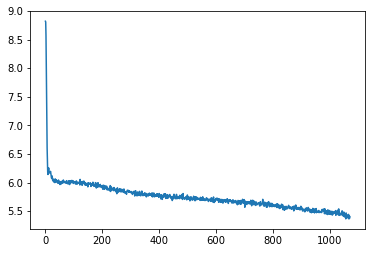

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  42 Batch    0/22   train_loss = 5.407
Epoch  42 Batch    1/22   train_loss = 5.374
Epoch  42 Batch    2/22   train_loss = 5.415
Epoch  42 Batch    3/22   train_loss = 5.388
Epoch  42 Batch    4/22   train_loss = 5.431
Epoch  42 Batch    5/22   train_loss = 5.443
Epoch  42 Batch    6/22   train_loss = 5.408
Epoch  42 Batch    7/22   train_loss = 5.419
Epoch  42 Batch    8/22   train_loss = 5.347
Epoch  42 Batch    9/22   train_loss = 5.369
Epoch  42 Batch   10/22   train_loss = 5.398
Epoch  42 Batch   11/22   train_loss = 5.385
Epoch  42 Batch   12/22   train_loss = 5.390
Epoch  42 Batch   13/22   train_loss = 5.348
Epoch  42 Batch   14/22   train_loss = 5.389
Epoch  42 Batch   15/22   train_loss = 5.379
Epoch  42 Batch   16/22   train_loss = 5.391
Epoch  42 Batch   17/22   train_loss = 5.344
Epoch  42 Batch   18/22   train_loss = 5.396
Epoch  42 Batch   19/22   train_loss = 5.379
Epoch  42 Batch   20/22   

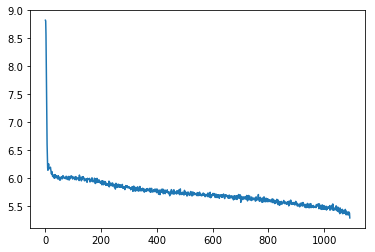

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  43 Batch    0/22   train_loss = 5.357
Epoch  43 Batch    1/22   train_loss = 5.389
Epoch  43 Batch    2/22   train_loss = 5.363
Epoch  43 Batch    3/22   train_loss = 5.337
Epoch  43 Batch    4/22   train_loss = 5.364
Epoch  43 Batch    5/22   train_loss = 5.329
Epoch  43 Batch    6/22   train_loss = 5.364
Epoch  43 Batch    7/22   train_loss = 5.359
Epoch  43 Batch    8/22   train_loss = 5.392
Epoch  43 Batch    9/22   train_loss = 5.343
Epoch  43 Batch   10/22   train_loss = 5.337
Epoch  43 Batch   11/22   train_loss = 5.353
Epoch  43 Batch   12/22   train_loss = 5.339
Epoch  43 Batch   13/22   train_loss = 5.403
Epoch  43 Batch   14/22   train_loss = 5.375
Epoch  43 Batch   15/22   train_loss = 5.389
Epoch  43 Batch   16/22   train_loss = 5.329
Epoch  43 Batch   17/22   train_loss = 5.374
Epoch  43 Batch   18/22   train_loss = 5.359
Epoch  43 Batch   19/22   train_loss = 5.377
Epoch  43 Batch   20/22   

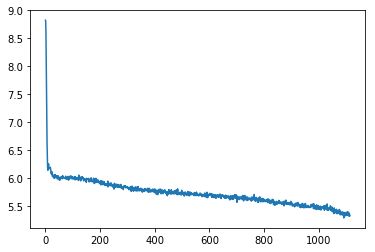

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  44 Batch    0/22   train_loss = 5.315
Epoch  44 Batch    1/22   train_loss = 5.321
Epoch  44 Batch    2/22   train_loss = 5.376
Epoch  44 Batch    3/22   train_loss = 5.340
Epoch  44 Batch    4/22   train_loss = 5.280
Epoch  44 Batch    5/22   train_loss = 5.320
Epoch  44 Batch    6/22   train_loss = 5.362
Epoch  44 Batch    7/22   train_loss = 5.339
Epoch  44 Batch    8/22   train_loss = 5.331
Epoch  44 Batch    9/22   train_loss = 5.344
Epoch  44 Batch   10/22   train_loss = 5.330
Epoch  44 Batch   11/22   train_loss = 5.311
Epoch  44 Batch   12/22   train_loss = 5.320
Epoch  44 Batch   13/22   train_loss = 5.353
Epoch  44 Batch   14/22   train_loss = 5.346
Epoch  44 Batch   15/22   train_loss = 5.354
Epoch  44 Batch   16/22   train_loss = 5.312
Epoch  44 Batch   17/22   train_loss = 5.317
Epoch  44 Batch   18/22   train_loss = 5.325
Epoch  44 Batch   19/22   train_loss = 5.311
Epoch  44 Batch   20/22   

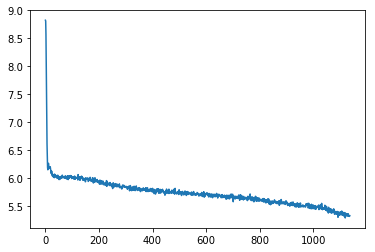

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  45 Batch    0/22   train_loss = 5.343
Epoch  45 Batch    1/22   train_loss = 5.307
Epoch  45 Batch    2/22   train_loss = 5.290
Epoch  45 Batch    3/22   train_loss = 5.338
Epoch  45 Batch    4/22   train_loss = 5.262
Epoch  45 Batch    5/22   train_loss = 5.304
Epoch  45 Batch    6/22   train_loss = 5.275
Epoch  45 Batch    7/22   train_loss = 5.298
Epoch  45 Batch    8/22   train_loss = 5.303
Epoch  45 Batch    9/22   train_loss = 5.312
Epoch  45 Batch   10/22   train_loss = 5.286
Epoch  45 Batch   11/22   train_loss = 5.242
Epoch  45 Batch   12/22   train_loss = 5.264
Epoch  45 Batch   13/22   train_loss = 5.297
Epoch  45 Batch   14/22   train_loss = 5.320
Epoch  45 Batch   15/22   train_loss = 5.257
Epoch  45 Batch   16/22   train_loss = 5.321
Epoch  45 Batch   17/22   train_loss = 5.307
Epoch  45 Batch   18/22   train_loss = 5.338
Epoch  45 Batch   19/22   train_loss = 5.327
Epoch  45 Batch   20/22   

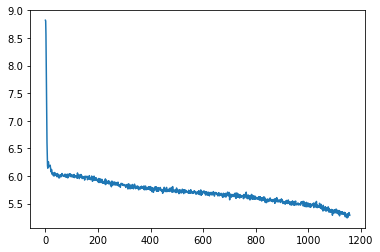

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  46 Batch    0/22   train_loss = 5.272
Epoch  46 Batch    1/22   train_loss = 5.302
Epoch  46 Batch    2/22   train_loss = 5.299
Epoch  46 Batch    3/22   train_loss = 5.286
Epoch  46 Batch    4/22   train_loss = 5.329
Epoch  46 Batch    5/22   train_loss = 5.278
Epoch  46 Batch    6/22   train_loss = 5.306
Epoch  46 Batch    7/22   train_loss = 5.289
Epoch  46 Batch    8/22   train_loss = 5.329
Epoch  46 Batch    9/22   train_loss = 5.263
Epoch  46 Batch   10/22   train_loss = 5.261
Epoch  46 Batch   11/22   train_loss = 5.299
Epoch  46 Batch   12/22   train_loss = 5.259
Epoch  46 Batch   13/22   train_loss = 5.292
Epoch  46 Batch   14/22   train_loss = 5.253
Epoch  46 Batch   15/22   train_loss = 5.265
Epoch  46 Batch   16/22   train_loss = 5.252
Epoch  46 Batch   17/22   train_loss = 5.277
Epoch  46 Batch   18/22   train_loss = 5.258
Epoch  46 Batch   19/22   train_loss = 5.288
Epoch  46 Batch   20/22   

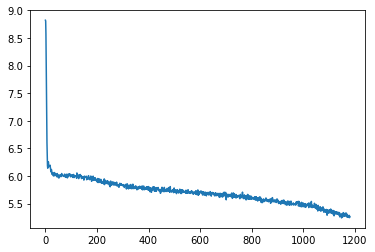

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  47 Batch    0/22   train_loss = 5.292
Epoch  47 Batch    1/22   train_loss = 5.301
Epoch  47 Batch    2/22   train_loss = 5.247
Epoch  47 Batch    3/22   train_loss = 5.269
Epoch  47 Batch    4/22   train_loss = 5.306
Epoch  47 Batch    5/22   train_loss = 5.277
Epoch  47 Batch    6/22   train_loss = 5.257
Epoch  47 Batch    7/22   train_loss = 5.284
Epoch  47 Batch    8/22   train_loss = 5.257
Epoch  47 Batch    9/22   train_loss = 5.262
Epoch  47 Batch   10/22   train_loss = 5.302
Epoch  47 Batch   11/22   train_loss = 5.277
Epoch  47 Batch   12/22   train_loss = 5.268
Epoch  47 Batch   13/22   train_loss = 5.223
Epoch  47 Batch   14/22   train_loss = 5.255
Epoch  47 Batch   15/22   train_loss = 5.290
Epoch  47 Batch   16/22   train_loss = 5.250
Epoch  47 Batch   17/22   train_loss = 5.205
Epoch  47 Batch   18/22   train_loss = 5.253
Epoch  47 Batch   19/22   train_loss = 5.214
Epoch  47 Batch   20/22   

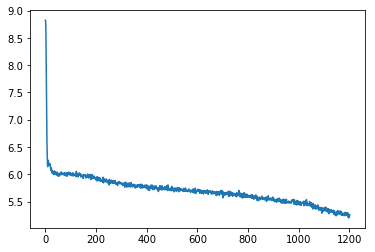

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  48 Batch    0/22   train_loss = 5.258
Epoch  48 Batch    1/22   train_loss = 5.263
Epoch  48 Batch    2/22   train_loss = 5.237
Epoch  48 Batch    3/22   train_loss = 5.217
Epoch  48 Batch    4/22   train_loss = 5.231
Epoch  48 Batch    5/22   train_loss = 5.277
Epoch  48 Batch    6/22   train_loss = 5.260
Epoch  48 Batch    7/22   train_loss = 5.244
Epoch  48 Batch    8/22   train_loss = 5.258
Epoch  48 Batch    9/22   train_loss = 5.220
Epoch  48 Batch   10/22   train_loss = 5.241
Epoch  48 Batch   11/22   train_loss = 5.233
Epoch  48 Batch   12/22   train_loss = 5.195
Epoch  48 Batch   13/22   train_loss = 5.255
Epoch  48 Batch   14/22   train_loss = 5.247
Epoch  48 Batch   15/22   train_loss = 5.232
Epoch  48 Batch   16/22   train_loss = 5.268
Epoch  48 Batch   17/22   train_loss = 5.215
Epoch  48 Batch   18/22   train_loss = 5.212
Epoch  48 Batch   19/22   train_loss = 5.226
Epoch  48 Batch   20/22   

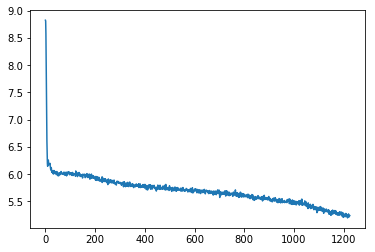

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  49 Batch    0/22   train_loss = 5.186
Epoch  49 Batch    1/22   train_loss = 5.232
Epoch  49 Batch    2/22   train_loss = 5.224
Epoch  49 Batch    3/22   train_loss = 5.281
Epoch  49 Batch    4/22   train_loss = 5.161
Epoch  49 Batch    5/22   train_loss = 5.205
Epoch  49 Batch    6/22   train_loss = 5.212
Epoch  49 Batch    7/22   train_loss = 5.229
Epoch  49 Batch    8/22   train_loss = 5.226
Epoch  49 Batch    9/22   train_loss = 5.217
Epoch  49 Batch   10/22   train_loss = 5.222
Epoch  49 Batch   11/22   train_loss = 5.216
Epoch  49 Batch   12/22   train_loss = 5.230
Epoch  49 Batch   13/22   train_loss = 5.237
Epoch  49 Batch   14/22   train_loss = 5.190
Epoch  49 Batch   15/22   train_loss = 5.236
Epoch  49 Batch   16/22   train_loss = 5.213
Epoch  49 Batch   17/22   train_loss = 5.166
Epoch  49 Batch   18/22   train_loss = 5.250
Epoch  49 Batch   19/22   train_loss = 5.214
Epoch  49 Batch   20/22   

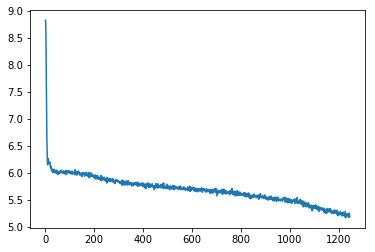

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  50 Batch    0/22   train_loss = 5.215
Epoch  50 Batch    1/22   train_loss = 5.186
Epoch  50 Batch    2/22   train_loss = 5.195
Epoch  50 Batch    3/22   train_loss = 5.192
Epoch  50 Batch    4/22   train_loss = 5.229
Epoch  50 Batch    5/22   train_loss = 5.204
Epoch  50 Batch    6/22   train_loss = 5.226
Epoch  50 Batch    7/22   train_loss = 5.178
Epoch  50 Batch    8/22   train_loss = 5.169
Epoch  50 Batch    9/22   train_loss = 5.210
Epoch  50 Batch   10/22   train_loss = 5.207
Epoch  50 Batch   11/22   train_loss = 5.197
Epoch  50 Batch   12/22   train_loss = 5.226
Epoch  50 Batch   13/22   train_loss = 5.205
Epoch  50 Batch   14/22   train_loss = 5.168
Epoch  50 Batch   15/22   train_loss = 5.178
Epoch  50 Batch   16/22   train_loss = 5.182
Epoch  50 Batch   17/22   train_loss = 5.154
Epoch  50 Batch   18/22   train_loss = 5.175
Epoch  50 Batch   19/22   train_loss = 5.121
Epoch  50 Batch   20/22   

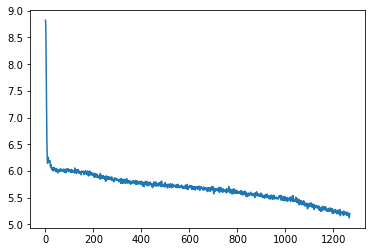

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  51 Batch    0/22   train_loss = 5.214
Epoch  51 Batch    1/22   train_loss = 5.275
Epoch  51 Batch    2/22   train_loss = 5.167
Epoch  51 Batch    3/22   train_loss = 5.188
Epoch  51 Batch    4/22   train_loss = 5.177
Epoch  51 Batch    5/22   train_loss = 5.170
Epoch  51 Batch    6/22   train_loss = 5.177
Epoch  51 Batch    7/22   train_loss = 5.187
Epoch  51 Batch    8/22   train_loss = 5.181
Epoch  51 Batch    9/22   train_loss = 5.151
Epoch  51 Batch   10/22   train_loss = 5.189
Epoch  51 Batch   11/22   train_loss = 5.182
Epoch  51 Batch   12/22   train_loss = 5.172
Epoch  51 Batch   13/22   train_loss = 5.182
Epoch  51 Batch   14/22   train_loss = 5.175
Epoch  51 Batch   15/22   train_loss = 5.221
Epoch  51 Batch   16/22   train_loss = 5.141
Epoch  51 Batch   17/22   train_loss = 5.180
Epoch  51 Batch   18/22   train_loss = 5.171
Epoch  51 Batch   19/22   train_loss = 5.154
Epoch  51 Batch   20/22   

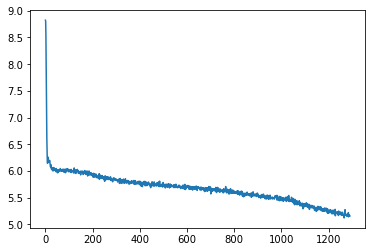

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  52 Batch    0/22   train_loss = 5.162
Epoch  52 Batch    1/22   train_loss = 5.154
Epoch  52 Batch    2/22   train_loss = 5.178
Epoch  52 Batch    3/22   train_loss = 5.158
Epoch  52 Batch    4/22   train_loss = 5.144
Epoch  52 Batch    5/22   train_loss = 5.100
Epoch  52 Batch    6/22   train_loss = 5.169
Epoch  52 Batch    7/22   train_loss = 5.156
Epoch  52 Batch    8/22   train_loss = 5.171
Epoch  52 Batch    9/22   train_loss = 5.171
Epoch  52 Batch   10/22   train_loss = 5.095
Epoch  52 Batch   11/22   train_loss = 5.147
Epoch  52 Batch   12/22   train_loss = 5.171
Epoch  52 Batch   13/22   train_loss = 5.154
Epoch  52 Batch   14/22   train_loss = 5.140
Epoch  52 Batch   15/22   train_loss = 5.188
Epoch  52 Batch   16/22   train_loss = 5.179
Epoch  52 Batch   17/22   train_loss = 5.183
Epoch  52 Batch   18/22   train_loss = 5.174
Epoch  52 Batch   19/22   train_loss = 5.181
Epoch  52 Batch   20/22   

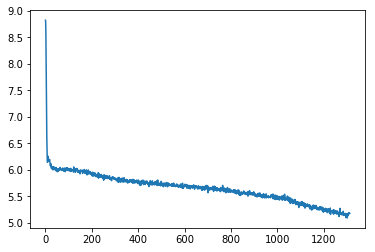

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  53 Batch    0/22   train_loss = 5.178
Epoch  53 Batch    1/22   train_loss = 5.087
Epoch  53 Batch    2/22   train_loss = 5.164
Epoch  53 Batch    3/22   train_loss = 5.133
Epoch  53 Batch    4/22   train_loss = 5.137
Epoch  53 Batch    5/22   train_loss = 5.137
Epoch  53 Batch    6/22   train_loss = 5.137
Epoch  53 Batch    7/22   train_loss = 5.144
Epoch  53 Batch    8/22   train_loss = 5.088
Epoch  53 Batch    9/22   train_loss = 5.151
Epoch  53 Batch   10/22   train_loss = 5.128
Epoch  53 Batch   11/22   train_loss = 5.133
Epoch  53 Batch   12/22   train_loss = 5.164
Epoch  53 Batch   13/22   train_loss = 5.144
Epoch  53 Batch   14/22   train_loss = 5.190
Epoch  53 Batch   15/22   train_loss = 5.155
Epoch  53 Batch   16/22   train_loss = 5.134
Epoch  53 Batch   17/22   train_loss = 5.161
Epoch  53 Batch   18/22   train_loss = 5.144
Epoch  53 Batch   19/22   train_loss = 5.173
Epoch  53 Batch   20/22   

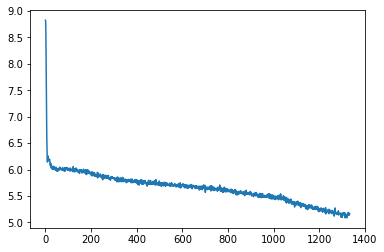

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  54 Batch    0/22   train_loss = 5.109
Epoch  54 Batch    1/22   train_loss = 5.142
Epoch  54 Batch    2/22   train_loss = 5.131
Epoch  54 Batch    3/22   train_loss = 5.118
Epoch  54 Batch    4/22   train_loss = 5.144
Epoch  54 Batch    5/22   train_loss = 5.157
Epoch  54 Batch    6/22   train_loss = 5.164
Epoch  54 Batch    7/22   train_loss = 5.117
Epoch  54 Batch    8/22   train_loss = 5.129
Epoch  54 Batch    9/22   train_loss = 5.119
Epoch  54 Batch   10/22   train_loss = 5.122
Epoch  54 Batch   11/22   train_loss = 5.146
Epoch  54 Batch   12/22   train_loss = 5.124
Epoch  54 Batch   13/22   train_loss = 5.109
Epoch  54 Batch   14/22   train_loss = 5.135
Epoch  54 Batch   15/22   train_loss = 5.120
Epoch  54 Batch   16/22   train_loss = 5.116
Epoch  54 Batch   17/22   train_loss = 5.167
Epoch  54 Batch   18/22   train_loss = 5.097
Epoch  54 Batch   19/22   train_loss = 5.100
Epoch  54 Batch   20/22   

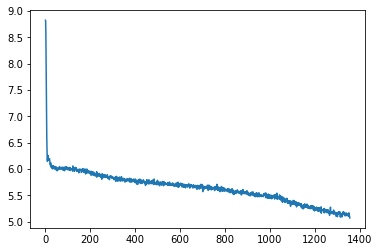

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  55 Batch    0/22   train_loss = 5.130
Epoch  55 Batch    1/22   train_loss = 5.119
Epoch  55 Batch    2/22   train_loss = 5.059
Epoch  55 Batch    3/22   train_loss = 5.081
Epoch  55 Batch    4/22   train_loss = 5.129
Epoch  55 Batch    5/22   train_loss = 5.112
Epoch  55 Batch    6/22   train_loss = 5.071
Epoch  55 Batch    7/22   train_loss = 5.111
Epoch  55 Batch    8/22   train_loss = 5.096
Epoch  55 Batch    9/22   train_loss = 5.137
Epoch  55 Batch   10/22   train_loss = 5.101
Epoch  55 Batch   11/22   train_loss = 5.084
Epoch  55 Batch   12/22   train_loss = 5.081
Epoch  55 Batch   13/22   train_loss = 5.077
Epoch  55 Batch   14/22   train_loss = 5.134
Epoch  55 Batch   15/22   train_loss = 5.088
Epoch  55 Batch   16/22   train_loss = 5.069
Epoch  55 Batch   17/22   train_loss = 5.093
Epoch  55 Batch   18/22   train_loss = 5.129
Epoch  55 Batch   19/22   train_loss = 5.090
Epoch  55 Batch   20/22   

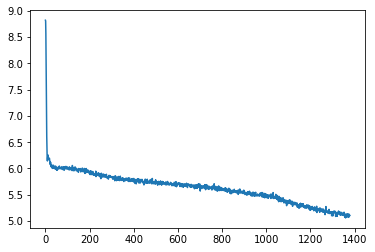

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  56 Batch    0/22   train_loss = 5.088
Epoch  56 Batch    1/22   train_loss = 5.085
Epoch  56 Batch    2/22   train_loss = 5.073
Epoch  56 Batch    3/22   train_loss = 5.080
Epoch  56 Batch    4/22   train_loss = 5.099
Epoch  56 Batch    5/22   train_loss = 5.091
Epoch  56 Batch    6/22   train_loss = 5.075
Epoch  56 Batch    7/22   train_loss = 5.127
Epoch  56 Batch    8/22   train_loss = 5.165
Epoch  56 Batch    9/22   train_loss = 5.107
Epoch  56 Batch   10/22   train_loss = 5.089
Epoch  56 Batch   11/22   train_loss = 5.123
Epoch  56 Batch   12/22   train_loss = 5.127
Epoch  56 Batch   13/22   train_loss = 5.060
Epoch  56 Batch   14/22   train_loss = 5.088
Epoch  56 Batch   15/22   train_loss = 5.054
Epoch  56 Batch   16/22   train_loss = 5.103
Epoch  56 Batch   17/22   train_loss = 5.093
Epoch  56 Batch   18/22   train_loss = 5.098
Epoch  56 Batch   19/22   train_loss = 5.128
Epoch  56 Batch   20/22   

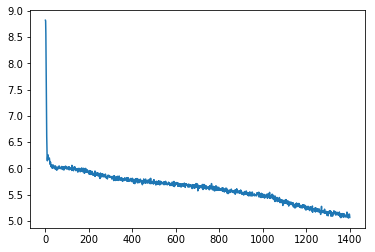

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  57 Batch    0/22   train_loss = 5.030
Epoch  57 Batch    1/22   train_loss = 5.091
Epoch  57 Batch    2/22   train_loss = 5.108
Epoch  57 Batch    3/22   train_loss = 5.115
Epoch  57 Batch    4/22   train_loss = 5.056
Epoch  57 Batch    5/22   train_loss = 5.073
Epoch  57 Batch    6/22   train_loss = 5.061
Epoch  57 Batch    7/22   train_loss = 5.114
Epoch  57 Batch    8/22   train_loss = 5.087
Epoch  57 Batch    9/22   train_loss = 5.080
Epoch  57 Batch   10/22   train_loss = 5.094
Epoch  57 Batch   11/22   train_loss = 5.117
Epoch  57 Batch   12/22   train_loss = 5.103
Epoch  57 Batch   13/22   train_loss = 5.061
Epoch  57 Batch   14/22   train_loss = 5.082
Epoch  57 Batch   15/22   train_loss = 5.059
Epoch  57 Batch   16/22   train_loss = 5.025
Epoch  57 Batch   17/22   train_loss = 5.054
Epoch  57 Batch   18/22   train_loss = 5.046
Epoch  57 Batch   19/22   train_loss = 5.059
Epoch  57 Batch   20/22   

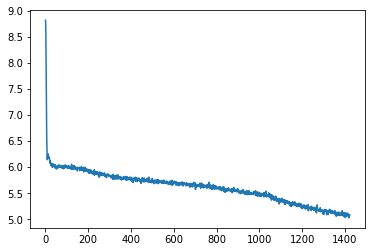

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  58 Batch    0/22   train_loss = 5.064
Epoch  58 Batch    1/22   train_loss = 5.098
Epoch  58 Batch    2/22   train_loss = 5.088
Epoch  58 Batch    3/22   train_loss = 5.060
Epoch  58 Batch    4/22   train_loss = 5.101
Epoch  58 Batch    5/22   train_loss = 5.071
Epoch  58 Batch    6/22   train_loss = 5.098
Epoch  58 Batch    7/22   train_loss = 5.106
Epoch  58 Batch    8/22   train_loss = 5.006
Epoch  58 Batch    9/22   train_loss = 5.124
Epoch  58 Batch   10/22   train_loss = 5.031
Epoch  58 Batch   11/22   train_loss = 5.063
Epoch  58 Batch   12/22   train_loss = 5.094
Epoch  58 Batch   13/22   train_loss = 5.032
Epoch  58 Batch   14/22   train_loss = 5.030
Epoch  58 Batch   15/22   train_loss = 5.064
Epoch  58 Batch   16/22   train_loss = 5.072
Epoch  58 Batch   17/22   train_loss = 5.036
Epoch  58 Batch   18/22   train_loss = 5.055
Epoch  58 Batch   19/22   train_loss = 5.066
Epoch  58 Batch   20/22   

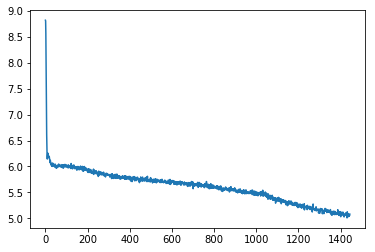

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  59 Batch    0/22   train_loss = 5.074
Epoch  59 Batch    1/22   train_loss = 5.049
Epoch  59 Batch    2/22   train_loss = 5.027
Epoch  59 Batch    3/22   train_loss = 5.046
Epoch  59 Batch    4/22   train_loss = 5.059
Epoch  59 Batch    5/22   train_loss = 5.083
Epoch  59 Batch    6/22   train_loss = 5.054
Epoch  59 Batch    7/22   train_loss = 5.097
Epoch  59 Batch    8/22   train_loss = 5.037
Epoch  59 Batch    9/22   train_loss = 5.037
Epoch  59 Batch   10/22   train_loss = 5.069
Epoch  59 Batch   11/22   train_loss = 5.066
Epoch  59 Batch   12/22   train_loss = 5.037
Epoch  59 Batch   13/22   train_loss = 5.070
Epoch  59 Batch   14/22   train_loss = 5.045
Epoch  59 Batch   15/22   train_loss = 5.062
Epoch  59 Batch   16/22   train_loss = 5.021
Epoch  59 Batch   17/22   train_loss = 5.056
Epoch  59 Batch   18/22   train_loss = 5.020
Epoch  59 Batch   19/22   train_loss = 5.016
Epoch  59 Batch   20/22   

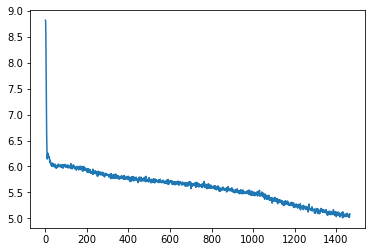

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  60 Batch    0/22   train_loss = 5.022
Epoch  60 Batch    1/22   train_loss = 5.069
Epoch  60 Batch    2/22   train_loss = 5.039
Epoch  60 Batch    3/22   train_loss = 5.071
Epoch  60 Batch    4/22   train_loss = 5.059
Epoch  60 Batch    5/22   train_loss = 5.026
Epoch  60 Batch    6/22   train_loss = 5.035
Epoch  60 Batch    7/22   train_loss = 5.036
Epoch  60 Batch    8/22   train_loss = 5.025
Epoch  60 Batch    9/22   train_loss = 5.050
Epoch  60 Batch   10/22   train_loss = 5.034
Epoch  60 Batch   11/22   train_loss = 5.052
Epoch  60 Batch   12/22   train_loss = 5.058
Epoch  60 Batch   13/22   train_loss = 5.004
Epoch  60 Batch   14/22   train_loss = 5.059
Epoch  60 Batch   15/22   train_loss = 5.026
Epoch  60 Batch   16/22   train_loss = 5.012
Epoch  60 Batch   17/22   train_loss = 5.016
Epoch  60 Batch   18/22   train_loss = 5.036
Epoch  60 Batch   19/22   train_loss = 4.995
Epoch  60 Batch   20/22   

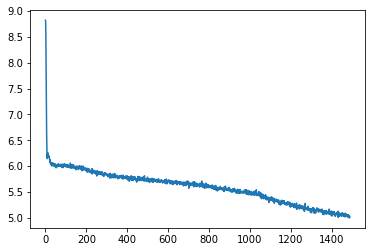

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  61 Batch    0/22   train_loss = 5.026
Epoch  61 Batch    1/22   train_loss = 5.007
Epoch  61 Batch    2/22   train_loss = 5.052
Epoch  61 Batch    3/22   train_loss = 5.056
Epoch  61 Batch    4/22   train_loss = 5.066
Epoch  61 Batch    5/22   train_loss = 5.022
Epoch  61 Batch    6/22   train_loss = 5.036
Epoch  61 Batch    7/22   train_loss = 5.029
Epoch  61 Batch    8/22   train_loss = 5.003
Epoch  61 Batch    9/22   train_loss = 5.020
Epoch  61 Batch   10/22   train_loss = 5.013
Epoch  61 Batch   11/22   train_loss = 5.016
Epoch  61 Batch   12/22   train_loss = 5.015
Epoch  61 Batch   13/22   train_loss = 5.014
Epoch  61 Batch   14/22   train_loss = 5.011
Epoch  61 Batch   15/22   train_loss = 5.025
Epoch  61 Batch   16/22   train_loss = 5.027
Epoch  61 Batch   17/22   train_loss = 5.028
Epoch  61 Batch   18/22   train_loss = 5.029
Epoch  61 Batch   19/22   train_loss = 5.018
Epoch  61 Batch   20/22   

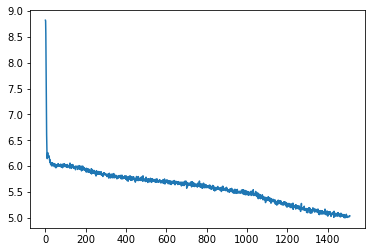

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  62 Batch    0/22   train_loss = 5.045
Epoch  62 Batch    1/22   train_loss = 5.060
Epoch  62 Batch    2/22   train_loss = 4.992
Epoch  62 Batch    3/22   train_loss = 5.022
Epoch  62 Batch    4/22   train_loss = 4.978
Epoch  62 Batch    5/22   train_loss = 5.034
Epoch  62 Batch    6/22   train_loss = 4.983
Epoch  62 Batch    7/22   train_loss = 5.015
Epoch  62 Batch    8/22   train_loss = 5.013
Epoch  62 Batch    9/22   train_loss = 4.967
Epoch  62 Batch   10/22   train_loss = 5.026
Epoch  62 Batch   11/22   train_loss = 5.000
Epoch  62 Batch   12/22   train_loss = 4.999
Epoch  62 Batch   13/22   train_loss = 5.006
Epoch  62 Batch   14/22   train_loss = 4.989
Epoch  62 Batch   15/22   train_loss = 5.034
Epoch  62 Batch   16/22   train_loss = 4.988
Epoch  62 Batch   17/22   train_loss = 4.993
Epoch  62 Batch   18/22   train_loss = 5.028
Epoch  62 Batch   19/22   train_loss = 4.989
Epoch  62 Batch   20/22   

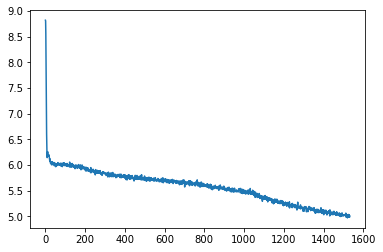

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  63 Batch    0/22   train_loss = 4.992
Epoch  63 Batch    1/22   train_loss = 5.007
Epoch  63 Batch    2/22   train_loss = 4.982
Epoch  63 Batch    3/22   train_loss = 4.986
Epoch  63 Batch    4/22   train_loss = 4.969
Epoch  63 Batch    5/22   train_loss = 4.980
Epoch  63 Batch    6/22   train_loss = 5.025
Epoch  63 Batch    7/22   train_loss = 4.987
Epoch  63 Batch    8/22   train_loss = 4.971
Epoch  63 Batch    9/22   train_loss = 4.976
Epoch  63 Batch   10/22   train_loss = 5.032
Epoch  63 Batch   11/22   train_loss = 5.014
Epoch  63 Batch   12/22   train_loss = 5.004
Epoch  63 Batch   13/22   train_loss = 5.000
Epoch  63 Batch   14/22   train_loss = 5.012
Epoch  63 Batch   15/22   train_loss = 4.989
Epoch  63 Batch   16/22   train_loss = 5.004
Epoch  63 Batch   17/22   train_loss = 5.000
Epoch  63 Batch   18/22   train_loss = 4.964
Epoch  63 Batch   19/22   train_loss = 4.982
Epoch  63 Batch   20/22   

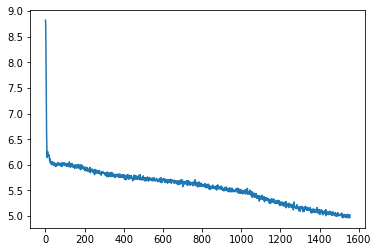

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  64 Batch    0/22   train_loss = 5.010
Epoch  64 Batch    1/22   train_loss = 4.990
Epoch  64 Batch    2/22   train_loss = 4.995
Epoch  64 Batch    3/22   train_loss = 5.043
Epoch  64 Batch    4/22   train_loss = 4.978
Epoch  64 Batch    5/22   train_loss = 4.985
Epoch  64 Batch    6/22   train_loss = 4.911
Epoch  64 Batch    7/22   train_loss = 5.013
Epoch  64 Batch    8/22   train_loss = 4.987
Epoch  64 Batch    9/22   train_loss = 4.997
Epoch  64 Batch   10/22   train_loss = 5.014
Epoch  64 Batch   11/22   train_loss = 4.985
Epoch  64 Batch   12/22   train_loss = 4.969
Epoch  64 Batch   13/22   train_loss = 4.965
Epoch  64 Batch   14/22   train_loss = 4.944
Epoch  64 Batch   15/22   train_loss = 4.981
Epoch  64 Batch   16/22   train_loss = 4.987
Epoch  64 Batch   17/22   train_loss = 4.921
Epoch  64 Batch   18/22   train_loss = 4.975
Epoch  64 Batch   19/22   train_loss = 5.018
Epoch  64 Batch   20/22   

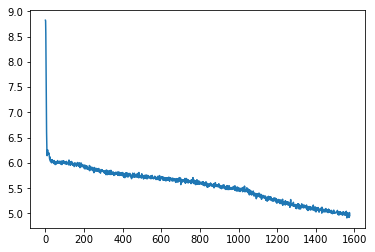

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  65 Batch    0/22   train_loss = 5.011
Epoch  65 Batch    1/22   train_loss = 4.958
Epoch  65 Batch    2/22   train_loss = 5.006
Epoch  65 Batch    3/22   train_loss = 4.955
Epoch  65 Batch    4/22   train_loss = 4.941
Epoch  65 Batch    5/22   train_loss = 4.938
Epoch  65 Batch    6/22   train_loss = 4.988
Epoch  65 Batch    7/22   train_loss = 4.965
Epoch  65 Batch    8/22   train_loss = 4.940
Epoch  65 Batch    9/22   train_loss = 4.944
Epoch  65 Batch   10/22   train_loss = 5.003
Epoch  65 Batch   11/22   train_loss = 4.981
Epoch  65 Batch   12/22   train_loss = 4.972
Epoch  65 Batch   13/22   train_loss = 4.971
Epoch  65 Batch   14/22   train_loss = 4.956
Epoch  65 Batch   15/22   train_loss = 4.960
Epoch  65 Batch   16/22   train_loss = 4.944
Epoch  65 Batch   17/22   train_loss = 4.945
Epoch  65 Batch   18/22   train_loss = 4.938
Epoch  65 Batch   19/22   train_loss = 4.963
Epoch  65 Batch   20/22   

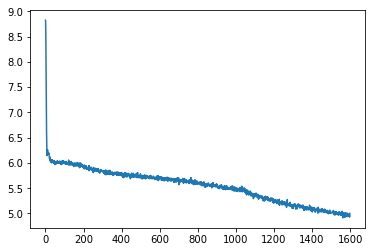

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  66 Batch    0/22   train_loss = 5.017
Epoch  66 Batch    1/22   train_loss = 4.980
Epoch  66 Batch    2/22   train_loss = 4.949
Epoch  66 Batch    3/22   train_loss = 4.931
Epoch  66 Batch    4/22   train_loss = 4.992
Epoch  66 Batch    5/22   train_loss = 4.986
Epoch  66 Batch    6/22   train_loss = 4.936
Epoch  66 Batch    7/22   train_loss = 4.944
Epoch  66 Batch    8/22   train_loss = 4.999
Epoch  66 Batch    9/22   train_loss = 4.980
Epoch  66 Batch   10/22   train_loss = 4.940
Epoch  66 Batch   11/22   train_loss = 4.965
Epoch  66 Batch   12/22   train_loss = 4.978
Epoch  66 Batch   13/22   train_loss = 4.903
Epoch  66 Batch   14/22   train_loss = 4.984
Epoch  66 Batch   15/22   train_loss = 4.974
Epoch  66 Batch   16/22   train_loss = 4.922
Epoch  66 Batch   17/22   train_loss = 4.970
Epoch  66 Batch   18/22   train_loss = 4.962
Epoch  66 Batch   19/22   train_loss = 4.918
Epoch  66 Batch   20/22   

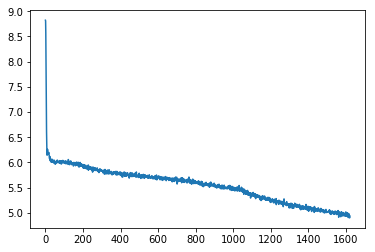

seq_length : 15
single_batch_len : 69085
batch_size : 1016
n_batches : 22
Epoch  67 Batch    0/22   train_loss = 4.958
Epoch  67 Batch    1/22   train_loss = 4.935
Epoch  67 Batch    2/22   train_loss = 4.900
Epoch  67 Batch    3/22   train_loss = 4.895
Epoch  67 Batch    4/22   train_loss = 5.004
Epoch  67 Batch    5/22   train_loss = 4.921
Epoch  67 Batch    6/22   train_loss = 4.920


In [ ]:
###### Number of Epochs
num_epochs = 1000
# Learning Rate
learning_rate = 0.001
# Show stats for every n number of batches
show_every_n_batches = 1
# override batch_distance
batch_distance_override = seq_length * 1 // 5


# added cyclic save and restore to interrupt training

# moved rerandomised batch generation in epoch loop
 
import matplotlib.pyplot as plt
import time

#batches = get_batches(int_text, batch_size, seq_length)

with tf.Session(graph=train_graph) as sess:
    
    try:
        saver.restore(sess, save_dir)
        print('Model Restored :)')
        with open('train_loss_history.p','rb') as file:
            train_loss_history = pickle.load(file)
        print('Loss_history Restored :)')
    except:
        train_loss_history = []
        sess.run(tf.global_variables_initializer())
        print('Initialised Model...')

    for epoch_i in range(num_epochs):
        
        # rerandomise batches
        batches = get_batches(int_text, batch_size, seq_length)

        state = sess.run(initial_state, {input_text: batches[0][0]})
    
        start = time.time()
        for batch_i, (x, y) in enumerate(batches):
            feed = {
                input_text: x,
                targets: y,
                initial_state: state,
                lr: learning_rate}
            train_loss, state, _ = sess.run([cost, final_state, train_op], feed)
            
            train_loss_history += [train_loss]

            # Show every <show_every_n_batches> batches
            if (epoch_i * len(batches) + batch_i) % show_every_n_batches == 0:
                print('Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                    epoch_i,
                    batch_i,
                    len(batches),
                    train_loss))
                
        print('computation time : {}'.format(time.time() - start))

        # Save Model
        saver = tf.train.Saver()
        saver.save(sess, save_dir)
        pickle.dump((train_loss_history), open('train_loss_history.p', 'wb'))
        print('Model Trained and Saved')
        plt.plot(train_loss_history)
        plt.show()

## Save Parameters
Save `seq_length` and `save_dir` for generating a new TV script.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Save parameters for checkpoint
helper.save_params((seq_length, save_dir))

# Checkpoint

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import tensorflow as tf
import numpy as np
import helper
import problem_unittests as tests

_, vocab_to_int, int_to_vocab, token_dict = helper.load_preprocess()
seq_length, load_dir = helper.load_params()

## Implement Generate Functions
### Get Tensors
Get tensors from `loaded_graph` using the function [`get_tensor_by_name()`](https://www.tensorflow.org/api_docs/python/tf/Graph#get_tensor_by_name).  Get the tensors using the following names:
- "input:0"
- "initial_state:0"
- "final_state:0"
- "probs:0"

Return the tensors in the following tuple `(InputTensor, InitialStateTensor, FinalStateTensor, ProbsTensor)` 

In [ ]:
def get_tensors(loaded_graph):
    """
    Get input, initial state, final state, and probabilities tensor from <loaded_graph>
    :param loaded_graph: TensorFlow graph loaded from file
    :return: Tuple (InputTensor, InitialStateTensor, FinalStateTensor, ProbsTensor)
    """
    InputTensor        = loaded_graph.get_tensor_by_name("input:0")
    InitialStateTensor = loaded_graph.get_tensor_by_name("initial_state:0")
    FinalStateTensor   = loaded_graph.get_tensor_by_name("final_state:0")
    ProbsTensor        = loaded_graph.get_tensor_by_name("probs:0")
    return InputTensor, InitialStateTensor, FinalStateTensor, ProbsTensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_tensors(get_tensors)

### Choose Word
Implement the `pick_word()` function to select the next word using `probabilities`.

In [ ]:
def pick_word(probabilities, int_to_vocab):
    """
    Pick the next word in the generated text
    :param probabilities: Probabilites of the next word
    :param int_to_vocab: Dictionary of word ids as the keys and words as the values
    :return: String of the predicted word
    """
    print(probabilities.index(max(probabilities)))
    
    sort,
    use it or not by random over treshold
    
    extra idee:  memory// if in memory increase probabability//memorise top picks or picks?
        deleate on hit
        memorise speaker and words
        
    add lieblingswörter / lieblingsactor (hoomers brain, sientists)
    
    prefere same letter
    return None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_pick_word(pick_word)

## Generate TV Script
This will generate the TV script for you.  Set `gen_length` to the length of TV script you want to generate.

In [ ]:
gen_length = 200
# homer_simpson, moe_szyslak, or Barney_Gumble
prime_word = 'moe_szyslak'

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(load_dir + '.meta')
    loader.restore(sess, load_dir)

    # Get Tensors from loaded model
    input_text, initial_state, final_state, probs = get_tensors(loaded_graph)

    # Sentences generation setup
    gen_sentences = [prime_word + ':']
    prev_state = sess.run(initial_state, {input_text: np.array([[1]])})

    # Generate sentences
    for n in range(gen_length):
        # Dynamic Input
        dyn_input = [[vocab_to_int[word] for word in gen_sentences[-seq_length:]]]
        dyn_seq_length = len(dyn_input[0])

        # Get Prediction
        probabilities, prev_state = sess.run(
            [probs, final_state],
            {input_text: dyn_input, initial_state: prev_state})
        
        pred_word = pick_word(probabilities[dyn_seq_length-1], int_to_vocab)

        gen_sentences.append(pred_word)
    
    # Remove tokens
    tv_script = ' '.join(gen_sentences)
    for key, token in token_dict.items():
        ending = ' ' if key in ['\n', '(', '"'] else ''
        tv_script = tv_script.replace(' ' + token.lower(), key)
    tv_script = tv_script.replace('\n ', '\n')
    tv_script = tv_script.replace('( ', '(')
        
    print(tv_script)

# The TV Script is Nonsensical
It's ok if the TV script doesn't make any sense.  We trained on less than a megabyte of text.  In order to get good results, you'll have to use a smaller vocabulary or get more data.  Luckly there's more data!  As we mentioned in the begging of this project, this is a subset of [another dataset](https://www.kaggle.com/wcukierski/the-simpsons-by-the-data).  We didn't have you train on all the data, because that would take too long.  However, you are free to train your neural network on all the data.  After you complete the project, of course.
# Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_tv_script_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.